# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**

Необходимо установить основные параметры, влияющие на рыночную стоимость недвижимости. Это позволит построить автоматизированную систему, отслеживающую аномалии и мошенническую деятельность.

**Ход исследования**

Данные для исследования мы получим из архива объявлений сервиса Яндекс.Недвижимость о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет из файла real_estate_data.csv.

Нам известно, что по каждой квартире на продажу доступны два вида данных: первая часть вписана пользователями самостоятельно, вторая - получена автоматически на основе картографических данных (например, расстояние до центра, аэропорта, ближайшего парка и водоёма).

О качестве данных ничего не известно. Поэтому перед исследованием данных понадобится их обзор.

Мы проверим данные на ошибки и оценим их влияние на исследование; затем, на этапе предобработки изучим возможность исправить самые критичные ошибки в данных. 

Далее проведем необходимые вычисления, на основании которых проанализируем данные и выявим параметры, влияющие на рыночную стоимость недвижимости.

Таким образом, исследование пройдёт в четыре этапа:

1. Обзор данных;
2. Предобработка данных;
3. Необходимые вычисления;
4. Исследовательский анализ данных.

### Обзор данных.

**Откроем файл с данными и изучим общую информацию.**

In [1]:
# Импорт библиотек.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Читаем файл и сохраняем данные в переменную data. Парамететром parse_dates меняем формат данных в столбце 
# first_day_exposition на %Y-%m-%d.
try:
    data = pd.read_csv('/Users/marina/CSV_files/real_estate_data.csv', sep = '\t', parse_dates=['first_day_exposition'])
except:
    data = pd.read_csv('real_estate_data.csv')

In [3]:
# Выводим для просмотра первые 10 строк таблицы.
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# Выводим основную информацию по таблице с данными.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

В таблице 22 столбца, 23699 строк.

Стилистика названий некоторых столбцов нарушена (cityCenters_nearest, parks_around3000, ponds_around3000, is_apartment).

В столбцах is_apartment, parks_nearest, ponds_nearest на порядок отличается количество значений.

В столбце is_appartment неправильный типа данных. В некоторых столбцах целесообразно изменить тип данных с float64 на int64.

Согласно документации к данным:
1. airports_nearest — расстояние до ближайшего аэропорта в метрах (м), float64;
2. balcony — число балконов, float64;
3. ceiling_height — высота потолков (м), float64;
4. cityCenters_nearest — расстояние до центра города (м), float64;
5. days_exposition — сколько дней было размещено объявление (от публикации до снятия), float64;
6. first_day_exposition — дата публикации, object;
7. floor — этаж, int64;
8. floors_total — всего этажей в доме, float64;
9. is_apartment — апартаменты (булев тип), object;
10. kitchen_area — площадь кухни в квадратных метрах (м²), float64;
11. last_price — цена на момент снятия с публикации, float64;
12. living_area — жилая площадь в квадратных метрах (м²), float64;
13. locality_name — название населённого пункта, object;
14. open_plan — свободная планировка (булев тип), bool; 
15. parks_around3000 — число парков в радиусе 3 км, float64;
16. parks_nearest — расстояние до ближайшего парка (м), float64;
17. ponds_around3000 — число водоёмов в радиусе 3 км, float64;
18. ponds_nearest — расстояние до ближайшего водоёма (м), float64;
19. rooms — число комнат, int64;
20. studio — квартира-студия (булев тип), bool; 
21. total_area — общая площадь квартиры в квадратных метрах (м²), float64;
22. total_images — число фотографий квартиры в объявлении, int64.

In [5]:
# Выводим числовое описание данных.
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Видим в некоторых столбцах большой разбос данных, например, квартира 900 кв.м, квартира с 19 комнатами, 100 метровым потолком и дом с 60 этажами, с жилой площадью 409,7 кв.м, с кухней в 112 кв.м, 5 балконами, или квартира с 0 комнатами, площадью 12 кв.м, высотой потолка 1 м и др. В данных явно есть пропуски и ошибки.

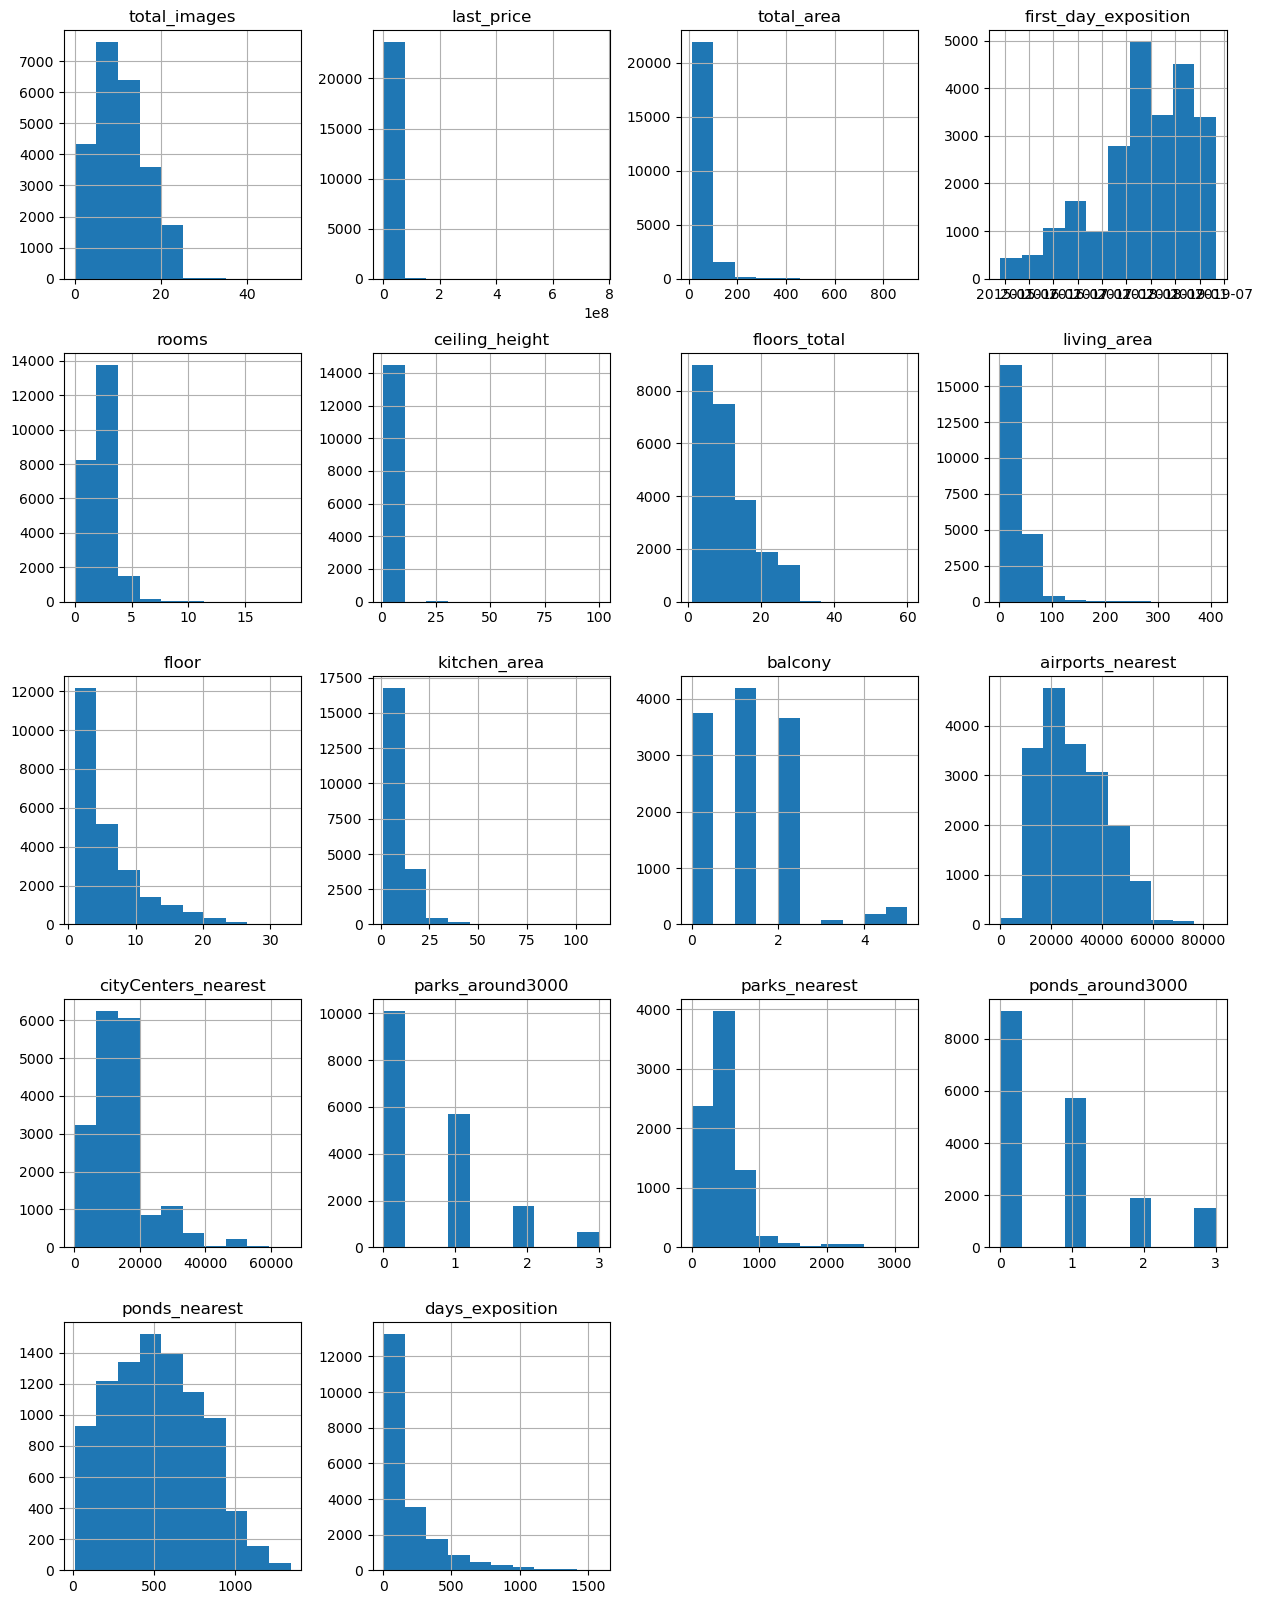

In [6]:
# Построим  общую гистограмму для всех числовых столбцов таблицы. 
data.hist(figsize = (15, 20));

**Вывод:**

На данном этапе мы прочитали файл с данными, изучили общую информацию. 
Впереди предобработка данных: изменение стилистики написания названия столбцов, работа с типами данных, пропусками, неявными дубликатами и аномалиями.

### Предобработка данных

In [7]:
# Округлим значения в стобцах с вещественным типом данных до двух цифр после запятой.
pd.set_option('display.float_format', '{:.2f}'.format)

In [8]:
# Приведем названия столбцов к единой стилистике.
data = data.rename(
    columns = {'is_apartment': 'apartment',
               'cityCenters_nearest': 'city_centers_nearest',
               'parks_around3000': 'parks_around_3000',
               'ponds_around3000': 'ponds_around_3000'}
)
data.columns             

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
# Выведем количество пропущенных значений для каждого стобца и отсортируем.
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around_3000        5518
parks_around_3000        5518
city_centers_nearest     5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
apartment               20924
dtype: int64

В 14 из 22 столбцов есть пропущенные значения. В  некоторых столбцах пропущена половина и более значений. Это очень много. Приведем данные в стобцах, где это возможно, к правильному формату и проанализируем, что можно с ними сделать для дальнейшей работы.

In [10]:
# Посмотрим долю пропусков данных в столбцах.
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
apartment,88.300000


В столбцах apartment - 88.3% пропусков, parks_nearest и ponds_nearest  - 65.9% и 61.6%, соответственно, balcony - 48.6%, ceiling_height - 38.8%. Пропущен очень большой  объем данных, но посмотрим далее, насколько эти данные важны для нашего исследования и как можно исправить ситуацию.

In [11]:
# Проверим данные на наличие явных дубликатов.
data.duplicated().sum()

0

Таких нет. Уже хорошо.

**Столбец total_images**

In [12]:
# Посмотрим числовое описание данных в столбце.
data['total_images'].describe()

count   23699.00
mean        9.86
std         5.68
min         0.00
25%         6.00
50%         9.00
75%        14.00
max        50.00
Name: total_images, dtype: float64

Пропущенных значений в столбце total_images нет, явных аномальных значений тоже нет. Чем больше фото, тем лучше, в разумных пределах.:) 

**Столбец open_plan**

In [13]:
# Выведем уникальные значения столбца.
data['open_plan'].unique()

array([False,  True])

Пропущенных значений  в стобце open_plan нет, аномалий тоже нет. Квартира либо со свободной планировкой, либо нет.

**Столбец studio**

In [14]:
# Выведем уникальные значения столбца.
data['studio'].unique()

array([False,  True])

Пропущенных значений  в стобце studio нет, аномалий тоже нет. Квартира либо студия, либо нет.

**Столбец floor**

In [15]:
# Выведем уникальные значения столбца.
data['floor'].unique()

array([ 8,  1,  4,  9, 13,  5,  6, 22, 26,  7,  3,  2, 11, 15, 18, 10, 19,
       16, 20, 27, 25, 17, 14, 12, 21, 28, 24, 23, 30, 29, 32, 33, 31])

Пропущенных значений в стобце floor нет, аномалий тоже нет. На гистограмме мы видим, что основная масса обявлений по этажности лежит в пределах 1-10 этажей.

**Столбец rooms**

In [16]:
# Выведем уникальные значения столца.
data['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

In [17]:
# Посчитаем количество этих уникальных значений.
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Пропущенных значений в стобце rooms нет, но скорее всего есть аномалии, 0 комнат - 197 строк, количество комнат больше 7 вообще вызывает вопросы. Есть объект с 19 комнатами. На гистограмме видно, что в основном комнат не больше 3-4. Основная масса данных лежит в плоскости 1-3 комнатных объектов недвижимости. Возможно, все, что выше 5 комнат - бывшие знаменитые питерские коммуналки. 

In [18]:
# Посмотрим на объявления, где количество комнат больше 10.
data[data['rooms'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
648,3,17500000.00,183.70,2018-07-01,11,3.40,7.00,138.80,7,NaN,...,13.30,NaN,Санкт-Петербург,23606.00,3148.00,0.00,NaN,0.00,NaN,NaN
866,5,25000000.00,363.00,2017-12-23,14,3.16,5.00,222.00,4,NaN,...,16.60,NaN,Санкт-Петербург,38076.00,7950.00,0.00,NaN,2.00,435.00,418.00
5358,20,65000000.00,590.00,2019-02-14,15,3.50,6.00,409.00,3,NaN,...,100.00,NaN,Санкт-Петербург,24447.00,4666.00,1.00,767.00,0.00,NaN,14.00
9688,8,33000000.00,194.10,2017-02-07,11,3.43,5.00,129.00,2,NaN,...,11.90,NaN,Санкт-Петербург,21469.00,1015.00,1.00,686.00,2.00,66.00,813.00
14498,6,32250000.00,374.60,2018-06-09,19,NaN,5.00,264.50,2,NaN,...,27.60,NaN,Санкт-Петербург,19497.00,3574.00,0.00,NaN,2.00,548.00,114.00
18848,6,28500000.00,270.00,2015-03-02,16,3.00,4.00,180.00,4,NaN,...,13.00,1.00,Санкт-Петербург,23575.00,4142.00,1.00,516.00,0.00,NaN,1365.00
19540,8,420000000.00,900.00,2017-12-06,12,2.80,25.00,409.70,25,NaN,...,112.00,NaN,Санкт-Петербург,30706.00,7877.00,0.00,NaN,2.00,318.00,106.00
20829,6,28659000.00,245.40,2016-03-31,14,NaN,4.00,168.30,2,NaN,...,25.90,0.00,Санкт-Петербург,21104.00,2054.00,3.00,541.00,2.00,118.00,95.00


8 объектов недвижимости имеют более 10 комнат. Но и общая площадь у них у всех начинается примерно с 200 кв. м и выше. Возможно, посчитаны ванные комнаты, туалеты, гардеробные и т.д. Ну и про коммунальные квартиры не забываем. Тогда такие цифры не кажутся необычными. Оставим эти данные без изменений.
Удалим строки, где комнат 0. Вероятнее всего, это какая-то ошибка при заполнении объявления, восстановить или заменить эти данные нельзя.

In [19]:
# Удаляем строки, где в столбце rooms - о комнат. 
data = data[data['rooms'] != 0]

**Столбец total_area**

In [20]:
# Посмотрим числовое описание данных в столбце.
data['total_area'].describe()

count   23502.00
mean       60.61
std        35.61
min        12.00
25%        40.20
50%        52.00
75%        70.00
max       900.00
Name: total_area, dtype: float64

Пропущенных значений в стобце total_area нет, но объект с площадью 900 кв. м вызывает вопросы, на гистограмме мы видим, что большая часть объектов по площади лежит в диапазоне до 100 кв. м. Посмотрим, сколько вообще объектов больше, к примеру, больше 500 кв. м по площади. 

In [21]:
# Проверим, сколько объектов в таблице больше 500 кв.м.
data[data['total_area'] > 500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
3117,19,140000000.00,631.00,2019-03-30,7,NaN,5.00,NaN,5,NaN,...,60.00,NaN,Санкт-Петербург,25707.00,4972.00,0.00,NaN,2.00,210.00,NaN
4237,1,50000000.00,517.00,2017-10-14,7,NaN,4.00,332.00,3,NaN,...,22.00,NaN,Санкт-Петербург,22835.00,1847.00,2.00,477.00,2.00,540.00,NaN
5358,20,65000000.00,590.00,2019-02-14,15,3.50,6.00,409.00,3,NaN,...,100.00,NaN,Санкт-Петербург,24447.00,4666.00,1.00,767.00,0.00,NaN,14.00
8018,20,84000000.00,507.00,2015-12-17,5,4.45,7.00,301.50,7,True,...,45.50,1.00,Санкт-Петербург,NaN,5735.00,2.00,110.00,0.00,NaN,1078.00
12859,20,140000000.00,631.20,2019-04-09,7,3.90,4.00,322.30,4,NaN,...,19.50,1.00,Санкт-Петербург,25707.00,4972.00,0.00,NaN,2.00,210.00,NaN
15651,20,300000000.00,618.00,2017-12-18,7,3.40,7.00,258.00,5,NaN,...,70.00,NaN,Санкт-Петербург,32440.00,5297.00,0.00,NaN,2.00,198.00,111.00
19540,8,420000000.00,900.00,2017-12-06,12,2.80,25.00,409.70,25,NaN,...,112.00,NaN,Санкт-Петербург,30706.00,7877.00,0.00,NaN,2.00,318.00,106.00


Таких объектов 7, при этом они все в Санкт-Петербурге и имееют довольно большое количество комнат (от 5 до 15). Возможно, это помещения бывших общежитий, коммунальных квартир или мини-гостиниц. Оставим эти данные пока как есть.

**Столбец last_price**

In [22]:
# Посмотрим числовое описание данных в столбце.
data['last_price'].describe()

count       23502.00
mean      6568404.08
std      10918859.97
min         12190.00
25%       3450000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

Пропусков  данных в столбце last_price нет, приведем значения в столбце к целочисленным.

In [23]:
data['last_price'] = data['last_price'].astype(int)

In [24]:
# Посмотрим на объявление с минимальной ценой.
data[data['last_price'] == 12190]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190,109.00,2019-03-20,2,2.75,25.00,32.00,25,NaN,...,40.50,NaN,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8.00


Цена для такой площади в Санкт-Петербурге нереальная. Общая площадь 109 кв.м, несмотря на маленькую  для двух комнат жилую площадь в 32 кв.м, площадь кухни - 50 кв.м. Либо тут ошибка в указании площадей, либо цена в объявлении специально занижена по каким-то причинам. Посмотрим, сколько объектов меньше по цене, чем 400 тыс. рублей.

In [25]:
data[data['last_price'] < 400000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
8793,7,12190,109.00,2019-03-20,2,2.75,25.00,32.00,25,NaN,...,40.50,NaN,Санкт-Петербург,36421.00,9176.00,1.00,805.00,0.00,NaN,8.00


Такой объект всего один. Удалим эту строку. Такой цены не может быть, это аномалия, которая портит  статистику по выборке.

In [26]:
# Удаляем строку, где в столбце last_price - 12190 руб.  
data = data[data['last_price'] != 12190]

In [27]:
# Посмотрим на объявление с максимальной  ценой.
data[data['last_price'] == 763000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12971,19,763000000,400.00,2017-09-30,7,NaN,10.00,250.00,10,NaN,...,NaN,2.00,Санкт-Петербург,25108.00,3956.00,1.00,530.00,3.00,756.00,33.00


Объект не самый большой по площади, но цена 735 млн. р кажется огромной. Если только это не исторический объект какой-нибудь. При этом объявление за 2017 год и объект выставлялся всего лишь 33 дня. Посмотрим данные по объектам дороже 300 млн.р.

In [28]:
data[data['last_price'] > 300000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
1436,19,330000000,190.00,2018-04-04,3,3.50,7.00,95.00,5,NaN,...,40.00,NaN,Санкт-Петербург,23011.00,1197.00,3.00,519.00,3.00,285.00,233.00
12971,19,763000000,400.00,2017-09-30,7,NaN,10.00,250.00,10,NaN,...,NaN,2.00,Санкт-Петербург,25108.00,3956.00,1.00,530.00,3.00,756.00,33.00
14706,15,401300000,401.00,2016-02-20,5,NaN,9.00,204.00,9,False,...,24.00,3.00,Санкт-Петербург,21912.00,2389.00,1.00,545.00,1.00,478.00,393.00
19540,8,420000000,900.00,2017-12-06,12,2.80,25.00,409.70,25,NaN,...,112.00,NaN,Санкт-Петербург,30706.00,7877.00,0.00,NaN,2.00,318.00,106.00


Таких нашлось 4, включая самый дорогой. Остальные три в пределах 420 млн. руб, что почти в половину меньше, чем максимально дорогой объект. Удалим строку с ним. Если цену в 420 млн. руб. за 900 кв.м еще можно как-то обосновать (площадь, близость к центру города, историческое здание и т.д), то 736 млн. руб. это перебор.

In [29]:
data = data[data['last_price'] != 736000000]

**Столбец balcony**

В этом столбце 11519 пропущенных значений. Вряд ли это ошибка, скорее всего данные не заполнены, потому что балкона нет. Заменим пропущенные данные на 0 - нет балкона.

In [30]:
# Изменим тип данных с float64 на int64 в столбце. Изменим проропущенные данные на 0 - нет балкона.
data['balcony'] = data['balcony'].fillna(value = 0).astype(int)

In [31]:
# Проверим уникальные значения в столбце.
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

На гистограмме видно, что основная масса данных поделилась на примерно одинаковые три части: нет балкона, 1 балкон или 2 балкона. У нас есть большие по площади объекты с большим количеством комнат, так что объекты с количеством балконов 4 и 5 вполне реальны. 

**Столбцы parks_around_3000 и ponds_around_3000**

По аналогии с balcony, делаем то же самое со столбцами parks_around_3000 (5518 пропущенных значений, пусть 0 - нет парков), 
ponds_around_3000 (5518 пропущенных значений, пусть 0- нет прудов).

In [32]:
# Заменяем пропущенные значения и приводим данные в столбце к целочисленному типу.
data['parks_around_3000'] = data['parks_around_3000'].fillna(value = 0).astype(int)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(value = 0).astype(int)

In [33]:
# Выведем уникальные значения столбцов.
print(data['parks_around_3000'].unique())
data['ponds_around_3000'].unique()

[1 0 2 3]


array([2, 0, 3, 1])

Количество парков и прудов в пределах нормы, такие данные выглядят вполне реально.

**Столбец days_exposition**

На гистограмме мы видим, что большая часть недвижимости продается за 100-150 дней, но есть и такие объекты, которые продавались более 500 дней, а некоторые больше 1000.

In [34]:
# Выводим общие данные по столбцу.
data['days_exposition'].describe()

count   20334.00
mean      181.54
std       220.10
min         1.00
25%        45.00
50%        96.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

В столбце 3181 пропуск (13.4%). Удалить такой объем данных нельзя, заменить тоже, поэтому оставляем их как есть.

In [35]:
# Посмотрим данные по объектам, которые продавались больще 1000 дней.
data[data['days_exposition'] > 1000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
109,2,7497600,62.50,2015-12-08,2,NaN,5.00,35.50,5,NaN,...,9.50,0,Пушкин,14517.00,26670.00,1,517.00,0,NaN,1048.00
353,4,5990000,43.50,2015-05-08,1,3.00,5.00,25.00,4,NaN,...,9.40,0,Санкт-Петербург,10527.00,10278.00,1,93.00,0,NaN,1292.00
398,7,12789000,79.30,2014-12-09,2,3.00,8.00,43.10,5,False,...,17.60,0,Санкт-Петербург,39393.00,11096.00,1,537.00,0,NaN,1345.00
437,12,3350000,37.00,2015-02-24,1,2.55,6.00,17.80,6,NaN,...,8.40,0,Петергоф,46151.00,34044.00,1,185.00,1,755.00,1273.00
459,13,5200000,51.00,2016-03-02,2,2.55,9.00,32.00,5,NaN,...,6.00,0,Санкт-Петербург,48522.00,16360.00,0,NaN,0,NaN,1153.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23248,5,4900000,80.00,2014-12-25,3,NaN,15.00,47.00,14,NaN,...,9.00,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,1187.00
23318,6,5620020,82.30,2015-03-10,3,2.70,21.00,45.60,12,NaN,...,15.70,0,Санкт-Петербург,21793.00,17121.00,0,NaN,1,31.00,1200.00
23389,6,2850000,40.00,2015-01-26,1,2.60,10.00,19.00,8,False,...,9.00,2,поселок Бугры,NaN,NaN,0,NaN,0,NaN,1012.00
23426,17,8778000,47.50,2014-12-29,1,3.00,7.00,NaN,4,NaN,...,11.70,2,Санкт-Петербург,39412.00,10186.00,1,1424.00,3,204.00,1360.00


276 объектов продавались так долго. Но если посмотреть на дату размещения объявления, то все эти объявления были опубликованы в 2014-2016 годах. Возможно, объявления просто забыли и они не были сняты с публикации вовремя?

**Столбец floors_total**

In [36]:
# Изучим уникальные значения в столбце, посчитаем их количество и отсортируем по возрастанию.
data['floors_total'].value_counts().sort_values()

37.00       1
34.00       1
60.00       1
52.00       1
33.00       1
29.00       1
36.00       3
28.00      21
35.00      22
1.00       25
26.00     122
21.00     151
27.00     162
11.00     200
13.00     229
20.00     265
22.00     282
19.00     330
23.00     346
15.00     361
2.00      383
8.00      388
24.00     454
18.00     492
14.00     545
7.00      589
3.00      662
17.00     815
6.00      911
25.00    1047
10.00    1169
4.00     1195
12.00    1355
16.00    1358
9.00     3749
5.00     5781
Name: floors_total, dtype: int64

In [37]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

В столбце floors_total скорее всего есть аномальные выбросы. На гистограмме основная масса объектов по этажности лежит в пределах 30 этажей. Сложно себе представить в Санкт-Петербурге и его окрестностях дома высотой в 60 этажей. 36-этажных здания 3, возможно это не ошибка в данных, но я думаю, что мы можем отбросить данные, где этажность выше 36.

In [38]:
# Выводим данные, где этажность выше 36.
data[data['floors_total'] > 36]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
2253,12,3800000,45.50,2018-06-28,2,2.88,60.00,27.40,4,NaN,...,7.40,0,Кронштадт,67763.00,49488.00,2,342.00,3,614.00,166.00
16731,9,3978000,40.00,2018-09-24,1,2.65,52.00,10.50,18,NaN,...,14.00,0,Санкт-Петербург,20728.00,12978.00,1,793.00,0,NaN,45.00
16934,5,4100000,40.00,2017-10-17,1,1.75,37.00,17.40,5,NaN,...,8.34,0,Санкт-Петербург,18732.00,20444.00,0,NaN,3,80.00,71.00


Таких зданий всего 3, удаляем их.

In [39]:
# Оставляем в датасете в столбце floors_total данные по высоте недвижимости  до 36 этажа включительно, удалив три строки
# по их индексам.
data.drop(labels = [2253, 16731, 16934], axis = 0, inplace = True)

Пропущенных значений всего 0.36% от общего числа  (86 от 23699), значение маленькое, заменить нельзя, поэтому удалим пропуски.

In [40]:
data.dropna(subset = ['floors_total'], inplace = True)

**Столбец apartment**

In [41]:
# Изучим данные в столбце.
data['apartment'].value_counts()

False    2719
True       50
Name: apartment, dtype: int64

В нем неправильный тип данных и самое большое во всем массиве данных число пропусков - 20924. При этом количествo True (т.е. недвижимость - это апартаменты) равно всего 50, что составляет всего 0,2% от всех данных, включая пропуски, и 1,8 от имеющихся False. Думаю, этот факт позволяет нам заменить пропуски на False, логично предположить, что люди бы отметили, что недвижимость  - это апартаменты, если бы это было так.

In [42]:
# Изменим тип данных стобца apartment на bool по аналогии со стобцами studio и open_plan и заменим пропуски.
data['apartment'] = data['apartment'].fillna(value = False).astype(bool)

**Столбец locality_name**

В столбце locality_name всего 49 пропусков. Удаляем эти строки, так как невозможно восстановить данные с названием населенных пунктов.

In [43]:
data.dropna(subset = ['locality_name'], inplace = True)

In [44]:
# Изучим уникальные значения в стобце с названиями населенных пунктов.
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [45]:
# Считаем количество уникальных значений.
len(data['locality_name'].unique())

362

Видим неявные дубликаты, например, посёлок Мурино и поселок Мурино - один и тот же населенный пункт. Таких значений довольно много и везде разница в написании слова поселок/посёлок.

In [46]:
# Заменяем неявные дубликаты.
data['locality_name'] = data['locality_name'].replace(
    ['посёлок Мурино','городской посёлок Янино-1','посёлок Аннино','посёлок Бугры','посёлок Возрождение','посёлок Гаврилово',    
    'посёлок городского типа Вырица','посёлок городского типа имени Свердлова','посёлок городского типа Красный Бор',
    'посёлок городского типа Кузьмоловский','посёлок городского типа Лебяжье','посёлок городского типа Рощино',
    'посёлок городского типа Рябово','посёлок городского типа Токсово','посёлок городского типа Форносово','посёлок Жилгородок',
    'посёлок Ильичёво','посёлок Кобралово','посёлок Коробицыно','посёлок Лисий Нос','посёлок Мельниково',
    'посёлок Мичуринское','посёлок Новый Свет','посёлок Пансионат Зелёный Бор','посёлок Перово','посёлок Петровское',
    'посёлок Победа','посёлок Старая Малукса','посёлок Стеклянный','посёлок Сумино','посёлок Тельмана','посёлок Терволово',
    'посёлок Усть-Луга'],
    ['поселок Мурино','городской поселок Янино-1','поселок Аннино','поселок Бугры','поселок Возрождение','поселок Гаврилово',
    'поселок городского типа Вырица','поселок городского типа имени Свердлова','поселок городского типа Красный Бор',
    'поселок городского типа Кузьмоловский','поселок городского типа Лебяжье','поселок городского типа Рощино',
    'поселок городского типа Рябово','поселок городского типа Токсово','поселок городского типа Форносово','поселок Жилгородок',
    'поселок Ильичёво','поселок Кобралово','посёлок Коробицыно','поселок Лисий Нос','поселок Мельниково',
    'поселок Мичуринское','поселок Новый Свет','поселок Пансионат Зелёный Бор','поселок Перово','поселок Петровское',
    'поселок Победа','поселок Старая Малукса','поселок Стеклянный','поселок Сумино','поселок Тельмана','поселок Терволово',
    'поселок Усть-Луга']
)

In [47]:
# Проверяем, как изменилось количество уникальных значений.
len(data['locality_name'].unique())

330

**Столбец living_area**

In [48]:
# Посмотрим числовое описание данных в столбце.
data['living_area'].describe()

count   21513.00
mean       34.59
std        22.08
min         2.00
25%        18.70
50%        30.00
75%        42.48
max       409.70
Name: living_area, dtype: float64

На гистограмме видим, что больше всего квартир по жилой площади в пределах 50 кв. м, далее значения до 100 кв.м. Квартира жилой площадью 409.70 кв.м  и ей подобные - исключение, выше я уже предполагала, что это могут общежития, коммуналки, отели, поэтому эти значения мы оставляем без изменений.

В столбце living_area 1898 пропущенных значений. Но в столбце total_area напротив значений living_area данные есть. Найдем их конверсию по медианным значениям и заменим пропуски.

In [49]:
# Посчитаем медианные значения стобцов living_area и total_area и найдем их конверсию.
living_area_conversion = data['living_area'].median() / data['total_area'].median()

In [50]:
# Заменим пропуски в столбце living_area  данными, полученными от умножения общей площади total_area на конверсию living_area и 
# total_area
data['living_area'].fillna(living_area_conversion * data['total_area'], inplace = True)

**Столбец kitchen_area**

In [51]:
# Посмотрим числовое описание данных в столбце.
data['kitchen_area'].describe()

count   21339.00
mean       10.56
std         5.90
min         1.30
25%         7.00
50%         9.10
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

На гистограмме - 25 кв.м - это граница по площади кухни в большей части объявлений, в основном кухни по площади в пределах 10-12 кв.м, но есть и выбивающиеся значения. Но если допустить, что в Санкт-Петербурге возможна квартира площадью более 400 кв.м, то почему бы и не быть кухне в 112 кв.м... А вот кухня в 1.3 кв. м вызывает больше вопросов.

In [52]:
# Посмотрим на эту кухню...
data[data['kitchen_area'] == 1.3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
20217,7,4250000,28.50,2019-05-01,1,2.80,14.00,19.50,10,False,...,1.30,0,Санкт-Петербург,37199.00,12721.00,0,NaN,0,NaN,NaN


Общая площадь тоже маленькая 28.5 кв.м... Посмотрим, на всякий случай данные по кухням, к примеру, меньше 3 кв. м.

In [53]:
data[data['kitchen_area'] < 3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
906,15,2600000,27.00,2017-07-10,1,2.75,23.00,18.00,18,False,...,2.00,0,Санкт-Петербург,22131.00,17459.00,0,NaN,1,411.00,10.00
6262,9,3100000,24.00,2018-06-25,2,3.00,5.00,16.00,5,False,...,2.00,0,Санкт-Петербург,31960.00,4914.00,2,426.00,1,936.00,54.00
7950,3,5967734,66.40,2017-02-07,2,NaN,4.00,44.40,2,False,...,2.89,0,Санкт-Петербург,44870.00,20802.00,0,NaN,0,NaN,335.00
8729,9,2200000,18.40,2018-08-20,1,2.52,3.00,14.00,3,False,...,2.40,0,Пушкин,20710.00,30687.00,0,NaN,1,155.00,59.00
9138,17,2920000,23.29,2018-12-12,1,NaN,3.00,21.00,1,False,...,2.00,0,Санкт-Петербург,19506.00,4008.00,0,NaN,2,45.00,107.00
11033,6,5350000,32.00,2016-04-20,1,NaN,14.00,16.00,10,False,...,2.00,0,Санкт-Петербург,19008.00,3953.00,0,NaN,1,69.00,210.00
16367,2,2720000,25.70,2017-10-30,1,NaN,19.00,22.60,11,False,...,2.00,0,Санкт-Петербург,14472.00,13268.00,0,NaN,0,NaN,109.00
17834,5,2940000,34.70,2017-10-09,1,NaN,26.00,15.50,14,False,...,2.30,1,поселок Мурино,NaN,NaN,0,NaN,0,NaN,318.00
19642,5,1190000,14.00,2018-07-29,1,NaN,5.00,11.00,1,False,...,2.00,0,Санкт-Петербург,9898.00,11122.00,0,NaN,0,NaN,4.00
20217,7,4250000,28.50,2019-05-01,1,2.80,14.00,19.50,10,False,...,1.30,0,Санкт-Петербург,37199.00,12721.00,0,NaN,0,NaN,NaN


Таких нашлось 11, из которых 7 - кухни площадью 2 кв.м. И такое, видимо бывает. Оставляем данные как есть.

В столбце  kitchen_area 2269 пропущенных значений. Но в столбце total_area напротив значений kitchen_area данные есть. Поступим аналогично столбцу living_area.

In [54]:
# Посчитаем медианные значения стобцов kitchen_area и total_area и найдем их конверсию.
kitchen_area_conversion = data['kitchen_area'].median() / data['total_area'].median()

In [55]:
# Заменим пропуски в столбце  kitchen_area данными, полученными от умножения общей площади total_area на конверсию kitchen_area 
# и total_area
data['kitchen_area'].fillna(kitchen_area_conversion * data['total_area'], inplace = True)

**Столбец ceiling_height**

In [56]:
# Выведем уникальные значения в столбце.
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Мы видим ряд значений, в которых скорее всего техническая ошибка, например, высота 25. м скорее всего означает 2.5 м, а вот данные, где высота потолка ниже 2 метров и выше 5 вызывают сомнения (1.2, 5.2, 5.8, 6., 10.3, 100). Логически непонятно, что они могут означать.

In [57]:
# Заменим значения, где это возможно.
data['ceiling_height'] = data['ceiling_height'].replace(
    ['25.','32.','27.','24.','26.','14.','20.','22.6','27.5','10.3'],
    ['2.5','3.2','2.7','2.4','2.6','1.4','2.0','2.26','2.75','1.03']
)

In [58]:
# Посчитаем количество квартир, где потолки выше 5 метров и ниже 2 метров.
(data[data['ceiling_height'] > 5.0]['ceiling_height'].count() + 
         data[data['ceiling_height'] < 2.0]['ceiling_height'].count())

36

Таких квартир всего 36. Возможно, конечно, что это исторические здания с колонными залами и высоченными потолками, и бывшими комнатами для прислуги с потолками ниже 2х метров или что-то подобное. Оставим как есть.

In [59]:
#Код ревьюера
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23367 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23367 non-null  int64         
 1   last_price            23367 non-null  int64         
 2   total_area            23367 non-null  float64       
 3   first_day_exposition  23367 non-null  datetime64[ns]
 4   rooms                 23367 non-null  int64         
 5   ceiling_height        14395 non-null  float64       
 6   floors_total          23367 non-null  float64       
 7   living_area           23367 non-null  float64       
 8   floor                 23367 non-null  int64         
 9   apartment             23367 non-null  bool          
 10  studio                23367 non-null  bool          
 11  open_plan             23367 non-null  bool          
 12  kitchen_area          23367 non-null  float64       
 13  balcony         

В столбце ceiling_height видим 9195 пропущенных значений от всех имеющихся значений в датасете. Это  много, несмотря на то, что высота потолков вряд ли играет существенную роль для анализа рыночной стоимости объектов недвижимости, отбросить такое количество данных мы не можем.

In [60]:
# Найдем медианное значение по столбцу ceiling_height и заменим им пропуски в данных.
ceiling_height_median  = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(value = ceiling_height_median)

**Столбец airports_nearest**

In [61]:
# Посмотрим числовое описание данных в столбце.
data['airports_nearest'].describe()

count   17920.00
mean    28823.34
std     12626.92
min         0.00
25%     18582.00
50%     26770.00
75%     37289.50
max     84869.00
Name: airports_nearest, dtype: float64

Видим странное минимальное значение до аэропорта 0 м, то есть недвижимость должна находиться в аэропорту, что невозможно.

In [62]:
# Посмотрим, сколько таких вариантов в датасете, предположим, что минимальное расстояние до аэропорта маожет быть не менее 200 м.
data[data['airports_nearest'] < 200]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
21085,0,7000000,34.70,2018-09-23,1,2.70,9.00,19.80,3,False,...,6.00,2,Санкт-Петербург,0.00,22801.00,0,NaN,0,NaN,60.00


Такой вариант всего один, можем его удалить как ошибку в данных.

In [63]:
data.drop(labels = [21085], axis = 0, inplace = True)

Данные по столбцу получены на основе картографических данных. Наличие пропусков может быть программной ошибкой или, возможно, названия населенных пунктов, вписанных в объявления продавцами недвижимости, не совпадают с названиями в картографической системе, и она просто не смогла определить местонахождение этих объектов на карте. Можно было бы попробовать найти соответствия в строках, например, Зеленогорск-73362,32 м, и, в аналогичной строке с названием Зеленогорск и отсутствием расстояния до аэропорта заполнить пропуск данными из первой строки, но я так не умею:) Оставим эти данные как есть, так же как аналогичные пропуски в city_centers_nearest, parks_nearest, ponds_nearest. 

In [64]:
# Переведем значения в столбце airports_nearest из м в км.
data['airports_nearest'] = data['airports_nearest'] / 1000

**Столбец parks_nearest**

In [65]:
# Посмотрим числовое описание данных в столбце.
data['parks_nearest'].describe()

count   7999.00
mean     490.19
std      341.69
min        1.00
25%      287.50
50%      454.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

Видим, что минимальное значение до ближайшего парка составляет 3 м, значит хотя бы один парк в пределах 3 км от продаваемого объекта есть. В данном столбце имеем 15620 пропущенных значений, больше половины. Поскольку эти пропуски должны были быть заполнены с помощью картографии, оставляем их как как есть, аналогично стобцу airports_nearest.

**Столбец ponds_nearest**

In [66]:
# Посмотрим числовое описание данных в столбце.
data['ponds_nearest'].describe()

count   8966.00
mean     518.28
std      278.03
min       13.00
25%      293.00
50%      503.00
75%      730.00
max     1344.00
Name: ponds_nearest, dtype: float64

Видим, что минимальное значение до ближайшего пруда составляет 16 м, значит хотя бы один пруд в пределах 3 км от продаваемого объекта есть. В данном столбце имеем 14589 пропущенных значений, больше половины. Поскольку эти пропуски должны были быть заполнены с помощью картографии, оставляем как их как есть, аналогично стобцу airports_nearest.

**Столбец city_centers_nearest**

In [67]:
# Посмотрим числовое описание данных в столбце.
data['city_centers_nearest'].describe()

count   17942.00
mean    14195.35
std      8628.34
min       181.00
25%      9235.00
50%     13091.00
75%     16280.00
max     65968.00
Name: city_centers_nearest, dtype: float64

Ничего особо странного в глаза не бросается. В данном столбце имеем 5519 пропущенных значений. Поскольку эти пропуски должны были быть заполнены с помощью картографии, оставляем как их как есть, аналогично стобцу airports_nearest.

**Вывод:**
В рамках этапа предобработки данных были сделаны следующие изменения:
1. Приведены к единому стилю названия стобцов исходной таблицы: is_apartment, cityCenters_nearest, parks_around3000, ponds_around3000;
2. Был изменен формат данных в столбцах balcony, last_price, days_exposition, first_day_exposition, floors_total, apartment, parks_around_3000, ponds_around_3000;
3. Данные в стобцах были проверены на аномалии, где это возможно, аномальные значения были удалены;
4. Данные проверены на наличие пропусков, где это возможно, пропуски были заменены на медиану данных по столбцу или удалены. В столбцах city_centers_nearest, airports_nearest, ponds_nearest, parks_nearest заменить пропущенные данные не представляется возможным, удалить тоже нельзя из-за существенного размера выборки, поэтому оставляем их в неизменном виде;
5. В стобце airports_nearest  расстояние из м переведено в км;
6. Данные проверены на наличие явных (отсутствуют) и неявных дубликатов;
7. Заменены неявные дубликаты в столбце locality_name;
8. Заменены технические ошибки в стобце ceiling_heght.

### Посчитайте и добавьте в таблицу новые столбцы

In [68]:
# Вычисляем цену одного квадратного метра и сохраняем данные в новый столбец square_meter_price, тип данных зададим int.
data['square_meter_price'] = (data['last_price'] / data['total_area']).astype(int)

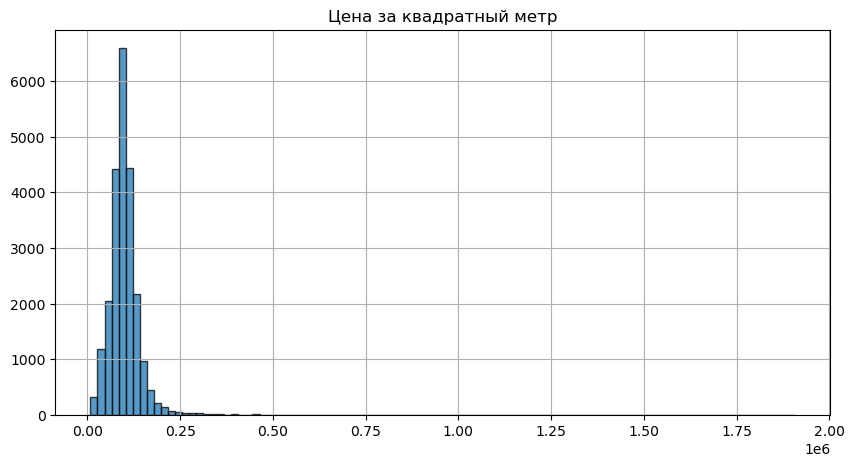

In [69]:
# Построим гистограмму по столбцу square_meter_price.
data['square_meter_price'].hist(bins = 100, figsize = (10,5), ec = 'black', alpha = 0.75, grid = True).set(
    title = 'Цена за квадратный метр');

Судя по гистограмме пик цены за 1 кв.м приходится на значения 100-125 тыс. руб.

In [70]:
# Создадим новый столбец weekday_exposition с днями недели публикации объявления (0 — понедельник, 1 — вторник и так далее).
data['weekday_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).weekday

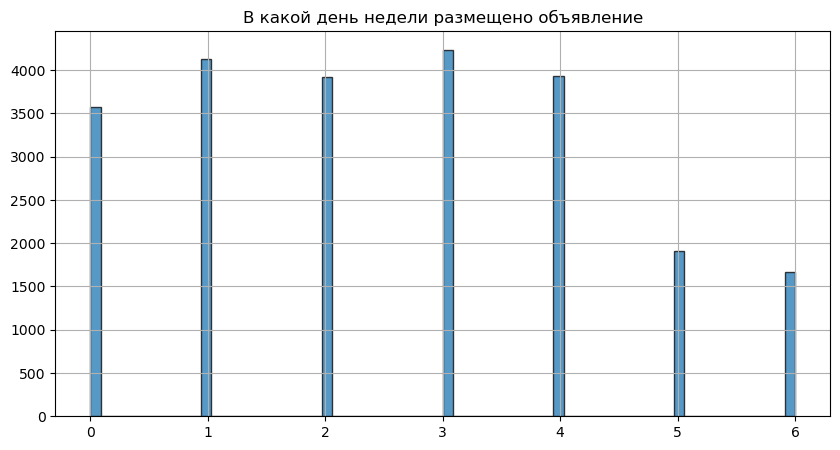

In [71]:
# Построим гистограмму по столбцу weekday_exposition.
data['weekday_exposition'].hist(bins = 70, figsize = (10,5), ec = 'black', alpha = 0.75, grid = True).set(
    title = 'В какой день недели размещено объявление');

По выходным объявления о продаже размещали примерно два раза реже, чем в будни. Во вторник и четверг немного чаще, чем в остальные будние дни.

In [72]:
# Создадим новый столбец  month_exposition с месяцем публикации объявления.
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

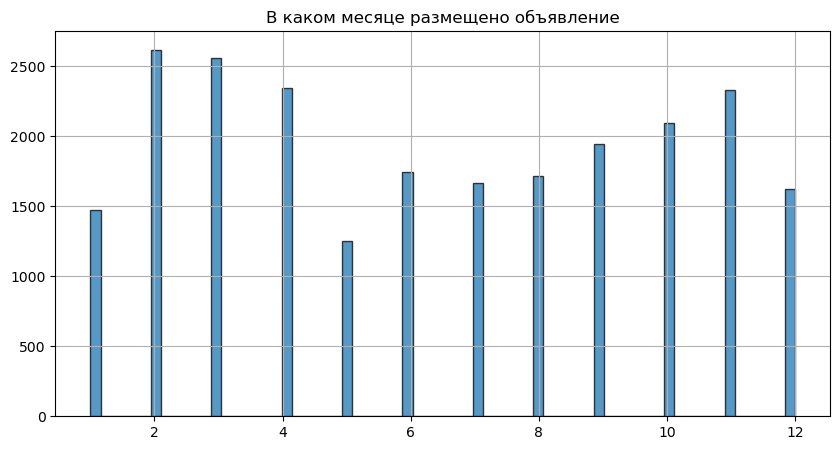

In [73]:
# Построим гистограмму по столбцу month_exposition.
data['month_exposition'].hist(bins = 70, figsize = (10,5), ec = 'black', alpha = 0.75, grid = True).set(
    title = 'В каком месяце размещено объявление');

Судя по гистограмме мы видим, что в декабре-январе примерно одинаковое количество объявлений, после чего в феврале начинается резкий рост больше чем в 1.5 раза, в апреле начинается небольшой спад, который переходит в резкий (примерно, в 2 раза) спад в мае. Начиная с июня и до ноября идет плавный рост количества объявлений, потом падение в декабре. Думаю такая картина может быть связяна с сезонностью и праздниками/выходными днями в месяцы падений значений. С приходом тепла (май) количество объявлений резко упало, что может быть связано с майскими праздниками, выходными днями, началом дачного сезона и посадочных работ. Декабрь-январь - это традиционно подготовка к Новому году в декабре и выходные дни в январе. 

In [74]:
# Создадим новый столбец  year_exposition с годом публикации объявления.
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year

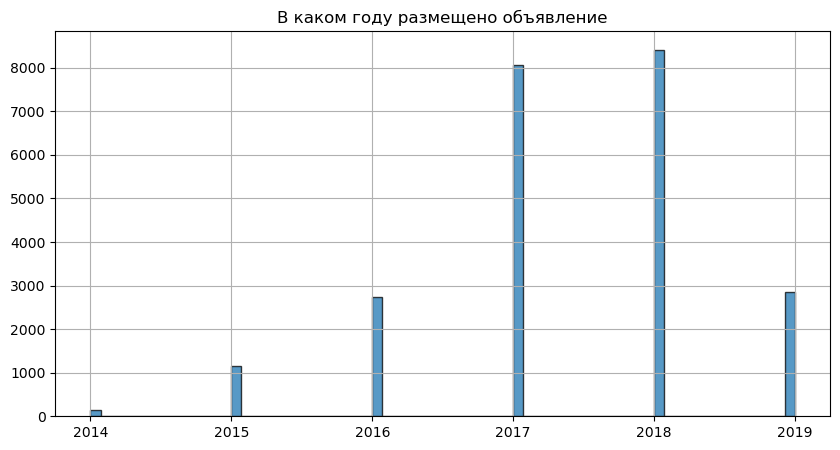

In [75]:
# Построим гистограмму по столбцу year_exposition.
data['year_exposition'].hist(bins = 70, figsize = (10,5), ec = 'black', alpha = 0.75, grid = True).set(
    title = 'В каком году размещено объявление');

Количество объявлений росло с 2014 по 2018 год (пик), в 2019  резко упало. Можно было бы обвинить в падении пандемию ковид-19, но локдаун начался только весной 2020го года, так что причина, вероятно, в чем то другом.

In [76]:
# Напишем функцию для категоризации типа этажа квартиры (значения — «первый», «последний», «другой»), данные сохраним
# в стобце which_floor. 
def floor_number(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['which_floor'] = data.apply(floor_number, axis = 1)

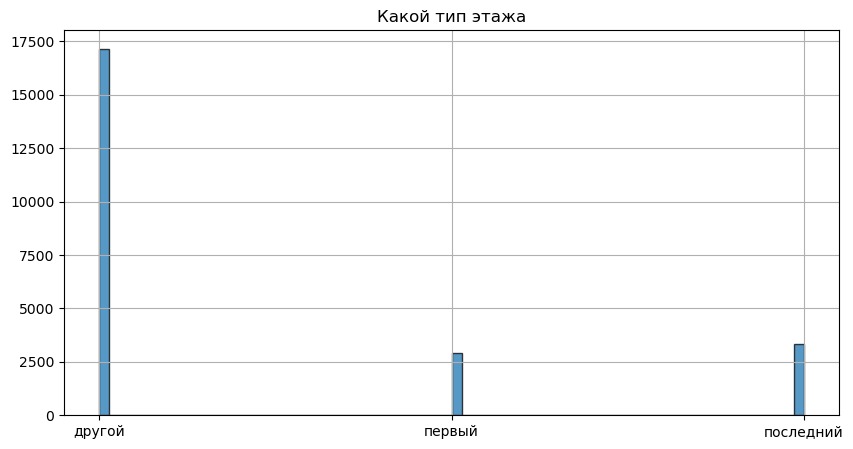

In [77]:
# Построим гистограмму по столбцу which_floor.
data['which_floor'].hist(bins = 70, figsize = (10,5), ec = 'black', alpha = 0.75, grid = True).set(
    title = 'Какой тип этажа');

Меньше всего объявлений, где этаж первый, незначительно больше - последний, и более 10000, где этаж между первым и последним.

In [78]:
# Создадим новый столбец city_centers_nearest_km, в котором переведем занчения в столбце из м в км.
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000

**Вывод:**
На данном этапе выполнили следующие действия:
1. Посчитали стоимость кв. метра недвижимости;
2. Добавили новые столбцы weekday_exposition, month_exposition, year_exposition, city_centers_nearest_km;
3. Категоризировали данные по этажности предлагаемых на рынке объектов: первый, последний, другой;
4. Выяснили, что пик цены за кв. м находится в пределах 100-125 тыс. руб.;
5. Проанализировали зависимость между днем, месяцем и годом публикации объявлений и их количеством. Можно сделать вывод, что в субботу-воскресенье объявлений публиковалось меньше, в мае-июне и декабре также отслеживается спад, предполагаю, что это связано с выходными, праздниками и началом дачного сезона. Зависимость существует и от года: с 2014 по 2018 годы идет рост количества объявлений, в 2019 году - резкое падение. С чем это связано, объяснить пока сложно;
6. Не первых и не последних этажей объявлениях в 5 раз больше первых и последних соответственно.

### Проведите исследовательский анализ данных

**Изучим, как быстро продавались квартиры по количеству дней со дня размещения объявления**

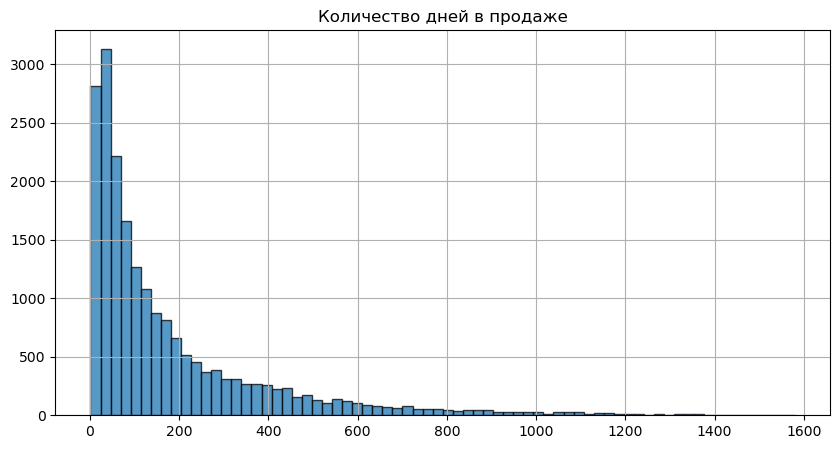

In [79]:
# Построим гистограмму по столбцу days_exposition.
data['days_exposition'].hist(bins = 70, figsize = (10,5), ec = 'black', alpha = 0.75, grid = True).set(
    title = 'Количество дней в продаже');

Судя по гистограмме первые три пика приходятся примерно на 20, 40, 60 дни, а затем на 100ый день (это максимальный пик).

In [80]:
# Посчитаем среднее арифметическое по столбцу days_exposition, сохраним его в переменной days_exposition_mean и 
# выведем значение на экран.
days_exposition_mean  = data['days_exposition'].mean()
print(days_exposition_mean)
## Посчитаем медиану по столбцу days_exposition, сохраним его в переменной days_exposition_median и выведем значение на экран.
days_exposition_median  = data['days_exposition'].median()
print(days_exposition_median)

181.39601167796528
96.0


По медианному значению квартиры продаются в среднем за три месяца (именно этот пик в 100 дней мы видим на гистограмме выше), среднее арифметическое почти в два раза больше медианы, вероятно за счет нескольких объектов недвижимости, которые продавались слишком долго. Посмотрим на гистограмму, которую ограничим по оси х 120 днями.

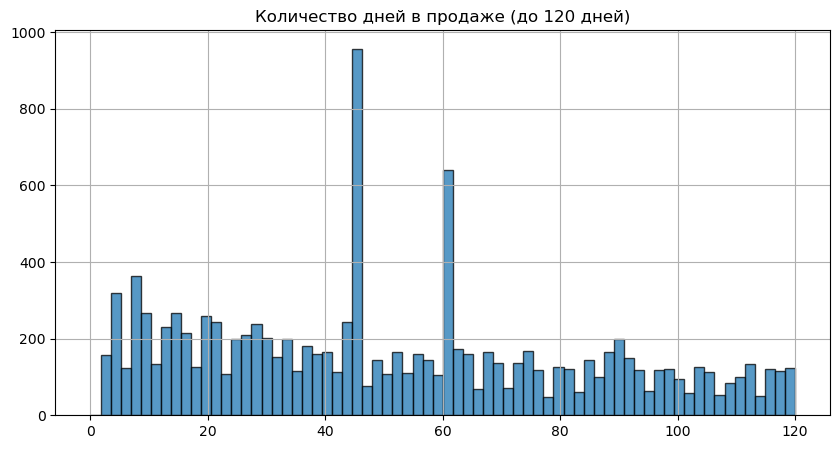

In [81]:
# Построим гистограмму по столбцу days_exposition для первых 120 дней.
data['days_exposition'].hist(bins = 70, figsize = (10,5), ec = 'black', range = (0,120), alpha = 0.75, 
                             grid = True).set(
    title = 'Количество дней в продаже (до 120 дней)');

На последней гистограмме мы видим несколько пиков: примерно на 45 день, потом на 60 день. Затем абсолютный пик на 95 день.  С учетом довольно ровной гистограммы, первые пики с разницей в 15 дней выглядят очень странно. Возможно, это как-то связано с правилами размещения объявлений... Например, если по объявлению не было никаких действий (обновлений, поднятий, просмотров и т.д), то оно автоматически убирается в архив... Но это только мое предположение, точной информации относительно этого феномена у меня нет. В целом быстрыми продажами можно считать продажи в течение 45 дней, долгими - более 95 дней.

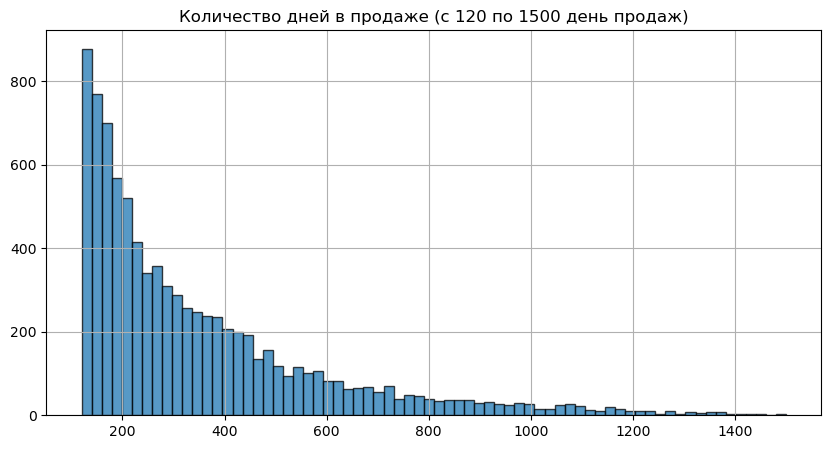

In [82]:
# Построим гистограмму по столбцу days_exposition со 120го по 1500 день продаж.
data['days_exposition'].hist(bins = 70, figsize = (10,5), ec = 'black', range = (
    120,1500), alpha = 0.75, grid = True).set(
    title = 'Количество дней в продаже (с 120 по 1500 день продаж)');

На гистограмме видим поэтапное снижение количества продаж в периоды со 120 по 200ый день, затем с 200 по 400ый  с определенными пиками и т.д.

**Проверим зависимость влияния скорости продажи от характеристик продаваемых объектов**

**Общая площадь**

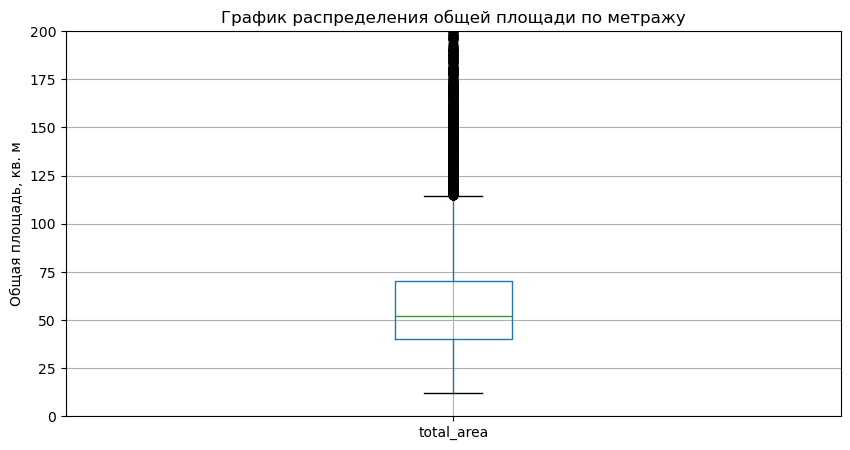

In [83]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму размаха для столбца total_area.
data.boxplot('total_area')
plt.ylim(0,200)
plt.title('График распределения общей площади по метражу')
plt.ylabel('Общая площадь, кв. м');

Диаграмма показывает, что в размах "усов" попадают квартиры с общей площадью примерно от  13 кв.м до 120 кв.м, с межквартильным размахом от 40 кв.м до 70 кв.м, с медианой на 55 кв.м, за пределами "усов" лежат значения выше 120 кв.м. 

In [84]:
# Сформируем сводную таблицу по стобцам  total_area и days_exposition, к которому применим метод median.
data_total_area_pivot = data.pivot_table(
    index = ['total_area'], values = 'days_exposition', aggfunc = 'median').reset_index().sort_values(
    by = 'days_exposition')
data_total_area_pivot

,total_area,days_exposition
549,45.23,3.00
640,49.98,3.00
871,60.96,3.00
112,29.45,3.00
103,28.86,3.00
...,...,...
1907,270.00,1365.00
1233,83.82,1406.00
1869,230.10,1441.00
389,38.63,1452.00


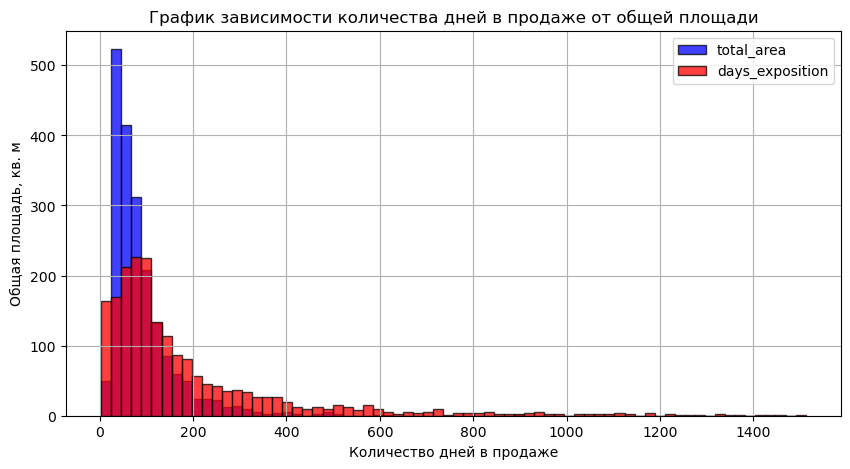

In [85]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим гистограмму зависимости количества дней в продаже от общей площади.
data_total_area_pivot.plot(
    kind = 'hist', bins = 70, grid = True, alpha = 0.75, ec = 'black', color = ['blue', 'red']).set(
    title = 'График зависимости количества дней в продаже от общей площади')
plt.xlabel('Количество дней в продаже')
plt.ylabel('Общая площадь, кв. м');


На этой гистограмме прослеживается определенная связь между сроками продажи и общей площадью: чем общая площадь больше, тем сроки продажи короче. Посмотрим на график с ограничением в 300 дней.

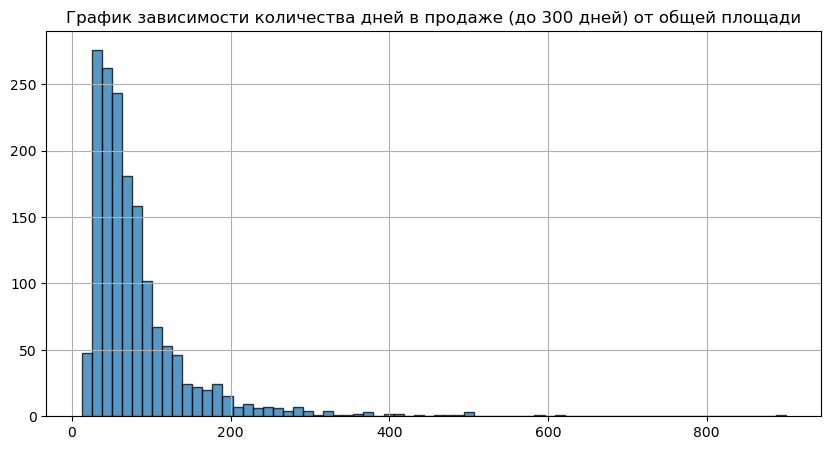

In [86]:
data_total_area_pivot.query('days_exposition < 300')['total_area'].hist(
    bins = 70, figsize = (10,5), ec = 'black', grid = True, alpha = 0.75).set(
    title = 'График зависимости количества дней в продаже (до 300 дней) от общей площади');

Предыдущий вывод подтверждается. Чем больше общая площадь, тем короче сроки продажи (пик 40-80 дней).

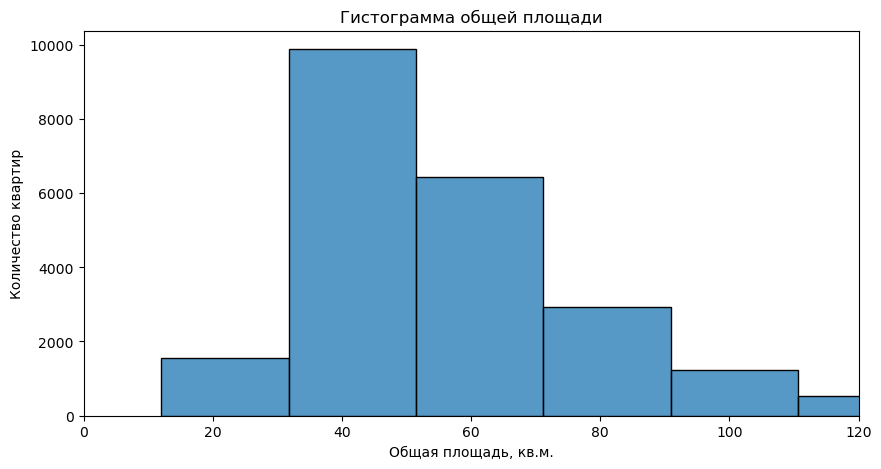

In [87]:
#Код ревьюера
sns.histplot(data['total_area'], kde=False, bins=45)
plt.xlim(0,120)
plt.title('Гистограмма общей площади')
plt.xlabel('Общая площадь, кв.м.')
plt.ylabel('Количество квартир')
plt.show()

**Жилая площадь**

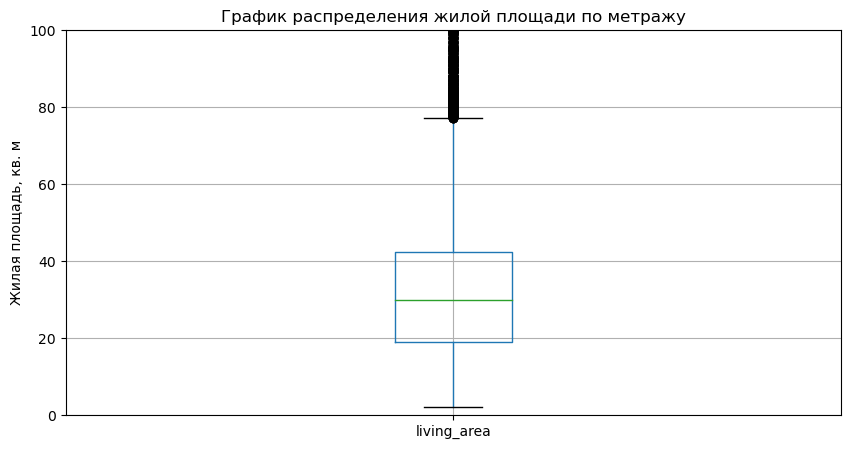

In [88]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму размаха для столбца living_area.
data.boxplot('living_area')
plt.ylim(0,100)
plt.title('График распределения жилой площади по метражу')
plt.ylabel('Жилая площадь, кв. м');

Диаграмма показывает, что в размах "усов" попадают квартиры с жилой площадью примерно от  2 кв.м до 78 кв.м, с межквартильным размахом от 20 кв.м до 43 кв.м, с медианой на 36 кв.м, за пределами "усов" лежат значения выше 78 кв.м. 

In [89]:
# Сформируем сводную таблицу по стобцам  living_area и days_exposition, к которому применим метод median.
data_living_area_pivot = data.pivot_table(
    index = ['living_area'], values = 'days_exposition', aggfunc = 'median').reset_index().sort_values(
    by = 'days_exposition')
data_living_area_pivot

,living_area,days_exposition
1003,35.17,3.00
330,18.12,3.00
153,15.11,3.00
340,18.28,3.00
959,33.73,3.00
...,...,...
1667,64.32,1355.00
2070,139.00,1395.00
1226,42.31,1406.00
1836,80.65,1489.00


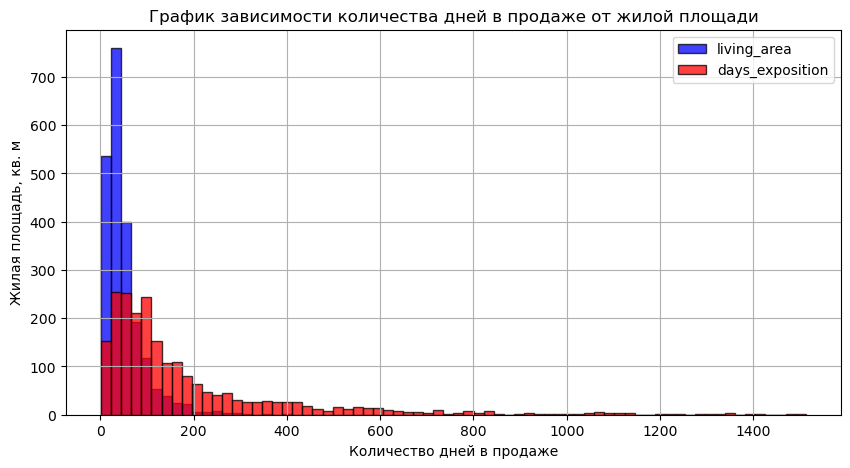

In [90]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим гистограмму зависимости количества дней в продаже от жилой площади.
data_living_area_pivot.plot(
    kind = 'hist', bins = 70, grid = True, alpha = 0.75, ec = 'black', color = ['blue', 'red']).set(
    title = 'График зависимости количества дней в продаже от жилой площади')
plt.xlabel('Количество дней в продаже')
plt.ylabel('Жилая площадь, кв. м');


На гистограмме мы видим, что недвижимость с маленькой жилой площадью продается дольше всего. Есть определенная зависимость, что быстрее продается недвижимость с большей жилплощадью. Есть несколько пиков до 100 дня, посмотрим на них "поближе".

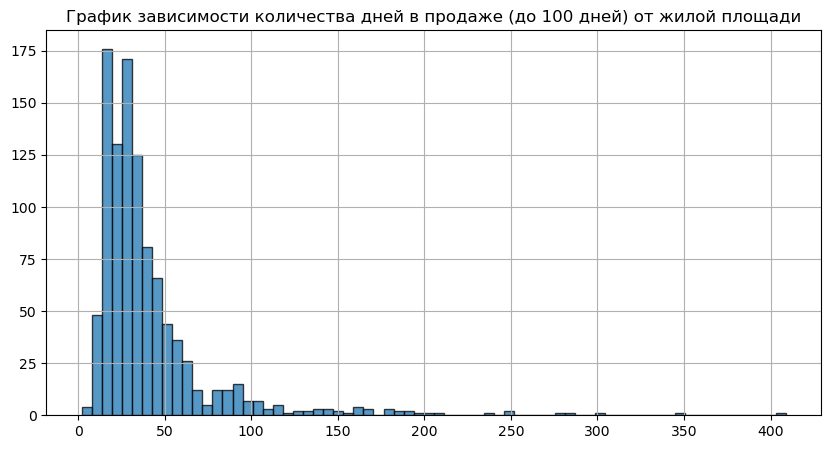

In [91]:
data_living_area_pivot.query('days_exposition < 100')['living_area'].hist(
    bins = 70, figsize = (10,5), ec = 'black', grid = True, alpha = 0.75).set(
    title = 'График зависимости количества дней в продаже (до 100 дней) от жилой площади');

И тут вывод подтверждается. Быстро продается недвижимость, где жилая площадь больше (15-30 дней).

**Площадь кухни**

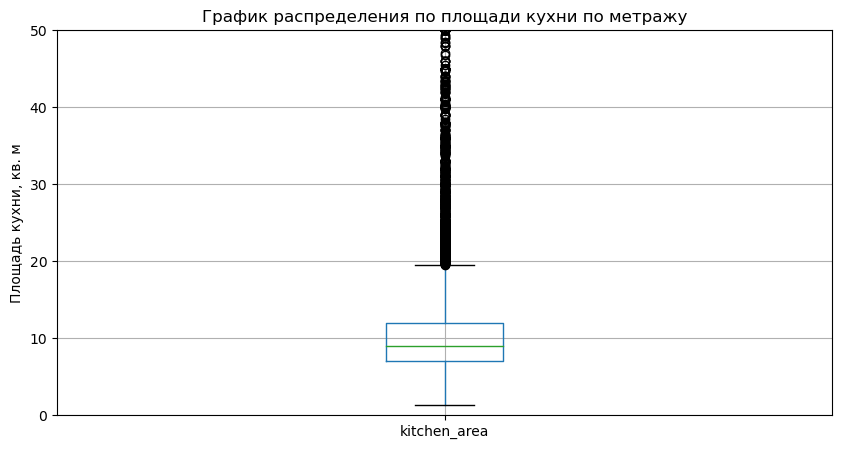

In [92]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму размаха для столбца kitchen_area.
data.boxplot('kitchen_area')
plt.ylim(0,50)
plt.title('График распределения по площади кухни по метражу')
plt.ylabel('Площадь кухни, кв. м');

Диаграмма показывает, что в размах "усов" попадают квартиры с площадью кухни примерно от  2 кв.м до 20 кв.м, с межквартильным размахом от 7 кв.м до 12 кв.м, с медианой на 9 кв.м, за пределами "усов" лежат значения выше 20 кв.м. 

In [93]:
# Сформируем сводную таблицу по стобцам kitchen_area и days_exposition, к которому применим метод median.
data_kitchen_area_pivot = data.pivot_table(
    index = ['kitchen_area'], values = 'days_exposition', aggfunc = 'median').reset_index().sort_values(
    by = 'days_exposition')
data_kitchen_area_pivot

,kitchen_area,days_exposition
100,5.05,3.00
188,6.14,3.00
56,4.39,4.00
245,6.73,4.00
827,12.93,4.00
...,...,...
979,15.42,1318.00
1296,29.30,1332.00
919,14.27,1355.00
1076,17.85,1406.00


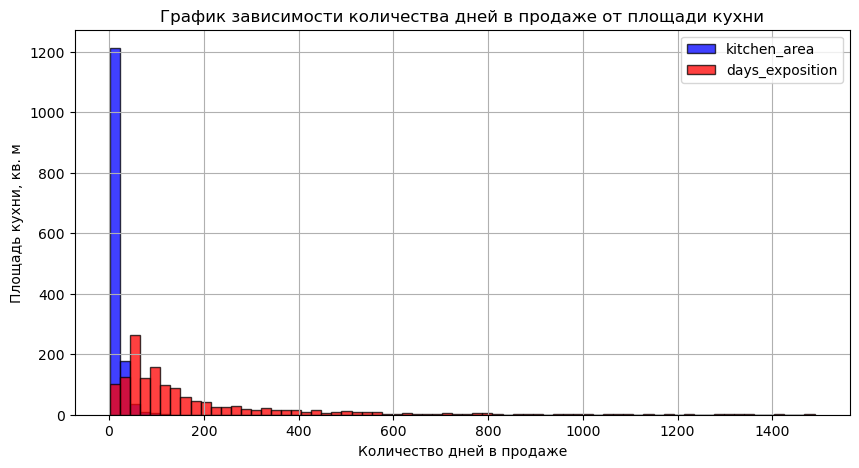

In [94]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим гистограмму зависимости количества дней в продаже от площади кухни.
data_kitchen_area_pivot.plot(
    kind = 'hist', bins = 70, grid = True, alpha = 0.75, ec = 'black', color = ['blue', 'red']).set(
    title = 'График зависимости количества дней в продаже от площади кухни')
plt.xlabel('Количество дней в продаже')
plt.ylabel('Площадь кухни, кв. м');

Судя по гистограмме квартиры с маленькой площадью кухни продаются дольше. Посмотрим на данные в срезе 50 дней.

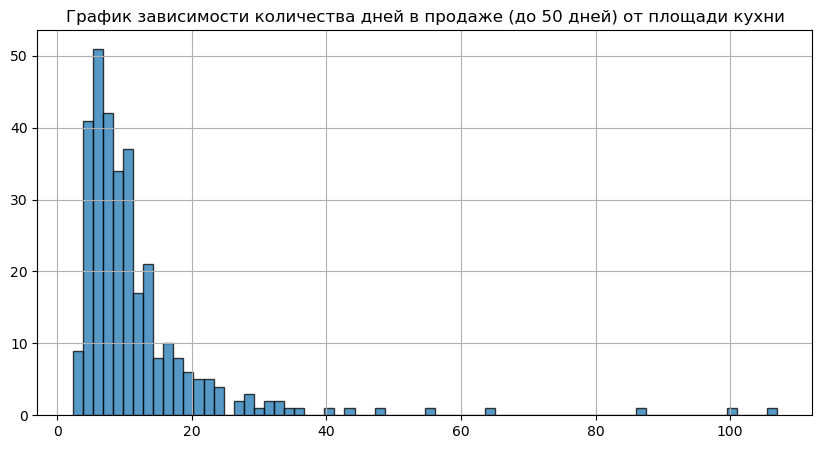

In [95]:
data_kitchen_area_pivot.query('days_exposition < 50')['kitchen_area'].hist(
    bins = 70, figsize = (10,5), ec = 'black', grid = True, alpha = 0.75).set(
    title = 'График зависимости количества дней в продаже (до 50 дней) от площади кухни');

Явная зависимость сроков продажи от площади кухни. Чем площадь кухни больше, тем сроки короче (пик до 10 дней).
В целом по анализу данных выше мы видим определенную зависимость: площадь (общая, жилая, кухни)-сроки продажи. 

**Цена объекта**

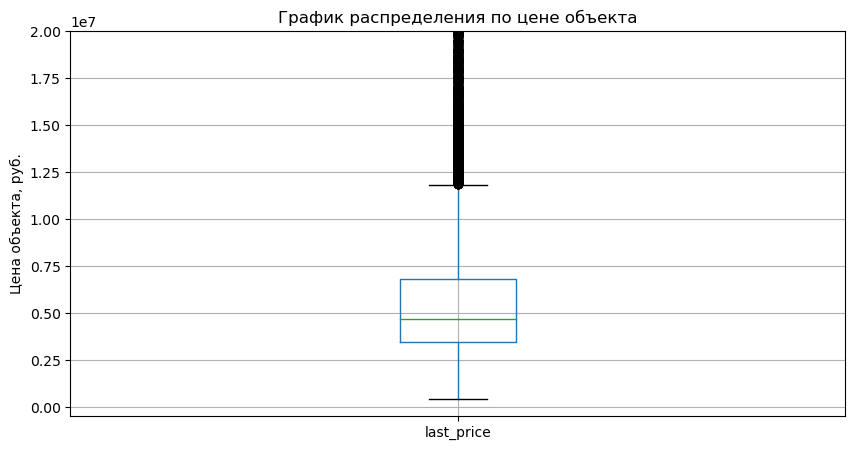

In [96]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму размаха для столбца last_price.
data.boxplot('last_price')
plt.ylim(-500000,20000000)
plt.title('График распределения по цене объекта')
plt.ylabel('Цена объекта, руб.');

Диаграмма показывает, что в размах "усов" попадают квартиры с итоговой стоимостью примерно от  до 1 млн. 200 тыс.рублей, с межквартильным размахом от 350 тыс. руб. до 700 тыс. руб., с медианой на 500 тыс. руб., за пределами "усов" лежат значения выше 1 млн. 200 тыс. руб.  

In [97]:
# Сформируем сводную таблицу по стобцам last_price и days_exposition, к которому применим метод median.
data_last_price_pivot = data.pivot_table(
    index = ['last_price'], values = 'days_exposition', aggfunc = 'median').reset_index().sort_values(
    by = 'last_price')
data_last_price_pivot

,last_price,days_exposition
0,430000,44.00
1,440000,45.00
2,450000,108.00
3,470000,46.00
4,480000,83.00
...,...,...
2618,300000000,111.00
2619,330000000,233.00
2620,401300000,393.00
2621,420000000,106.00


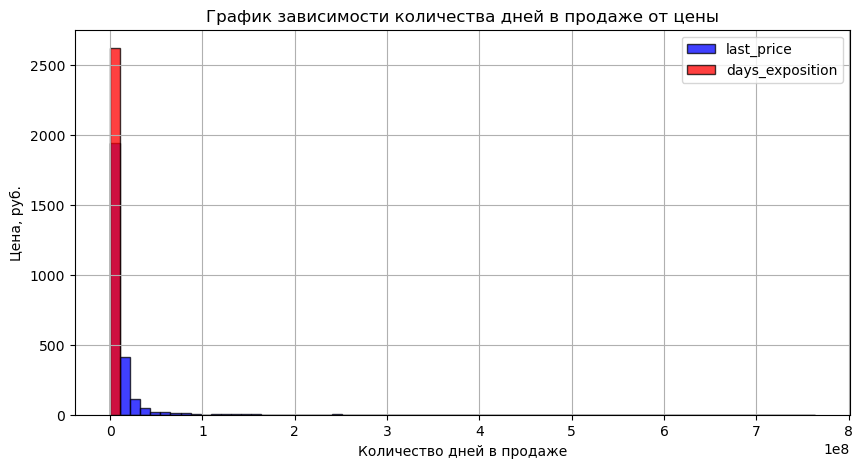

In [98]:
# Задаем размер графика
plt.rcParams['figure.figsize'] = [10,5] 
## Построим гистограмму зависимости количества дней в продаже от цены.
data_last_price_pivot.plot(
    kind = 'hist', bins = 70, grid = True, alpha = 0.75, ec = 'black', color = ['blue', 'red']).set(
    title = 'График зависимости количества дней в продаже от цены')
plt.xlabel('Количество дней в продаже')
plt.ylabel('Цена, руб.');

На графике ясно видно, что чем выше цена, тем дольше продавался объект. 

**Количество комнат**

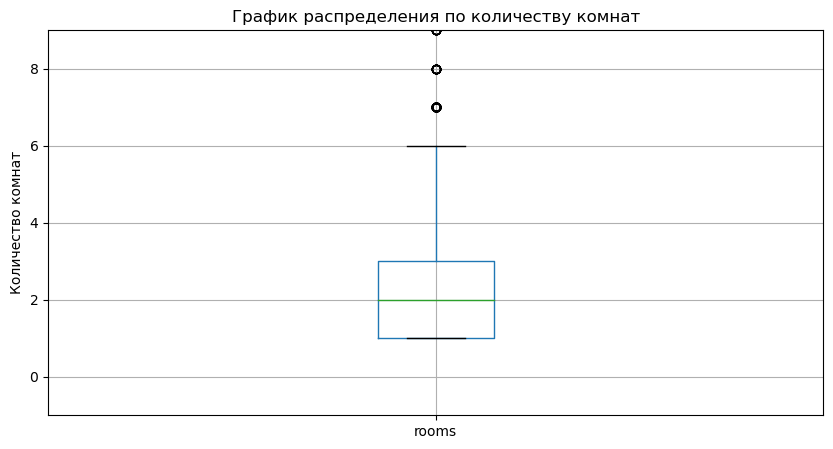

In [99]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму размаха для столбца rooms.
data.boxplot('rooms')
plt.ylim(-1,9)
plt.title('График распределения по количеству комнат')
plt.ylabel('Количество комнат');

Диаграмма показывает, что в размах "усов" попадают  квартиры  до 6 комнат с межквартильным размахом от 1 до 3х комнат, с медианой на 2х комнатах, за пределами "усов" лежат значения больше 6 комнат.  

In [100]:
# Сформируем сводную таблицу по стобцам rooms и days_exposition, к которому применим метод median.
data_rooms_pivot = data.pivot_table(
    index = ['rooms'], values = 'days_exposition', aggfunc = 'median').reset_index().sort_values(
    by = 'days_exposition')
data_rooms_pivot

,rooms,days_exposition
13,15,14.00
9,10,44.00
0,1,81.00
1,2,91.00
11,12,106.00
2,3,114.00
15,19,114.00
6,7,138.00
3,4,155.00
4,5,191.00


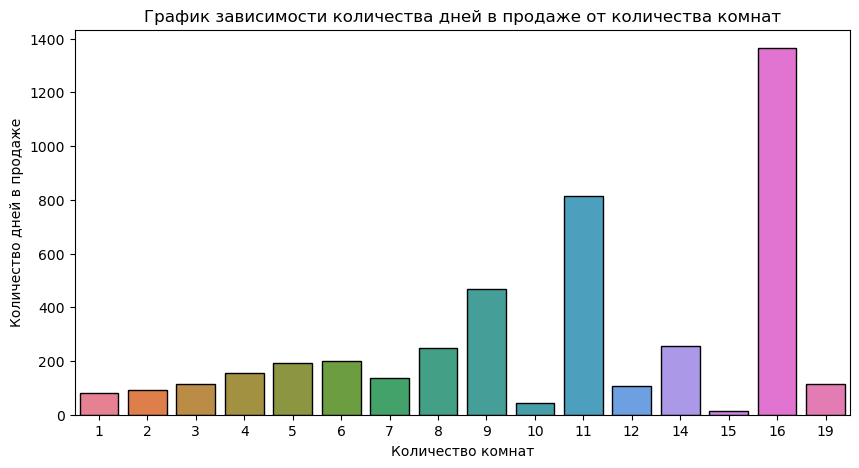

In [101]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим столбчатую диаграмму зависимости количества дней в продаже от количества комнат.
sns.barplot(data = data_rooms_pivot, x = 'rooms', y = 'days_exposition', palette = 'husl', ec = 'black').set(
    title = 'График зависимости количества дней в продаже от количества комнат')
plt.ylabel('Количество дней в продаже')
plt.xlabel('Количество комнат');

Очевидной завистимости скорости продажи от количества комнат, учитывая межквартильный размах от 1 до 3 комнат, нет. 11, 14, 16 комнат продавались дольше всего, а 15 - быстрее всего, но тут, скорее всего,  речь  идет об аномальных значениях, к которым нужен индивидуальный подход.

**Высота потолков**

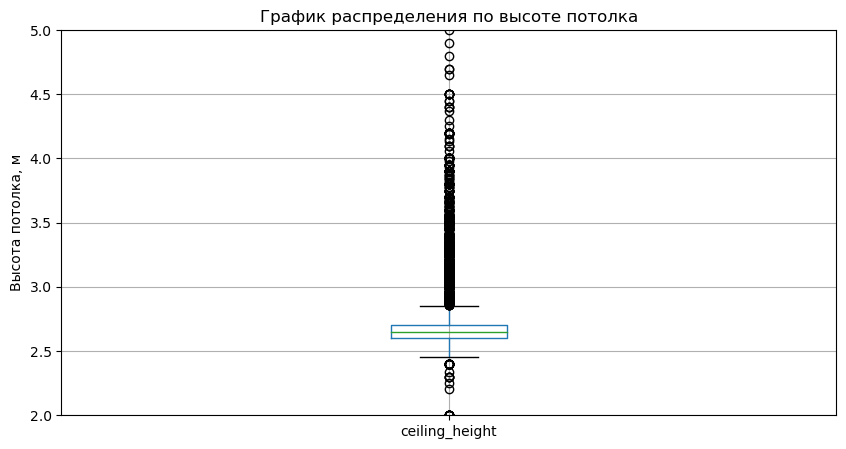

In [102]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
# Построим диаграмму размаха для столбца ceiling_height.
data.boxplot('ceiling_height')
plt.ylim(2,5)
plt.title('График распределения по высоте потолка')
plt.ylabel('Высота потолка, м');

Диаграмма показывает, что в размах "усов" попадают квартиры с потолком от 2.2 м до 3.2 м  с межквартильным размахом от 2.5 м до 3.3 м, с медианой  в 2.7 м, за пределами "усов" лежат значения выше 3.3 м.

In [103]:
# Сформируем сводную таблицу по стобцам ceiling_height и days_exposition, к которому применим метод median.
data_ceiling_height_pivot = data.pivot_table(
    index = ['ceiling_height'], values = 'days_exposition', aggfunc = 'median').reset_index().sort_values(
    by = 'ceiling_height')
data_ceiling_height_pivot

,ceiling_height,days_exposition
0,1.00,13.00
1,1.20,248.00
2,2.00,57.50
3,2.20,45.00
4,2.25,45.00
...,...,...
169,25.00,181.00
170,26.00,267.00
171,27.00,72.00
172,27.50,61.00


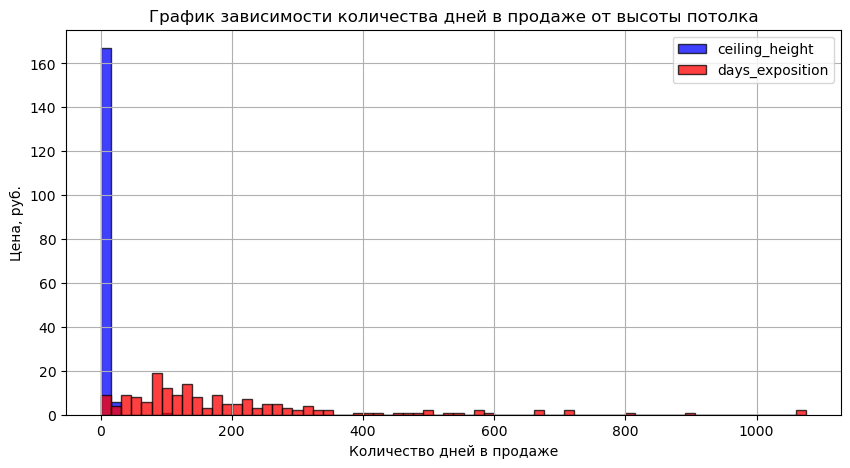

In [104]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим гистограмму зависимости количества дней в продаже от высоты потолка.
data_ceiling_height_pivot.plot(
    kind = 'hist', bins = 70, grid = True, alpha = 0.75, ec = 'black', color = ['blue', 'red']).set(
    title = 'График зависимости количества дней в продаже от высоты потолка')
plt.xlabel('Количество дней в продаже')
plt.ylabel('Цена, руб.');

Явной зависимости скорости продажи недвижимости от высоты потолка не прослеживается. Попробуем посмотреть "поближе" и ограничим количество дней в продаже 50ю.

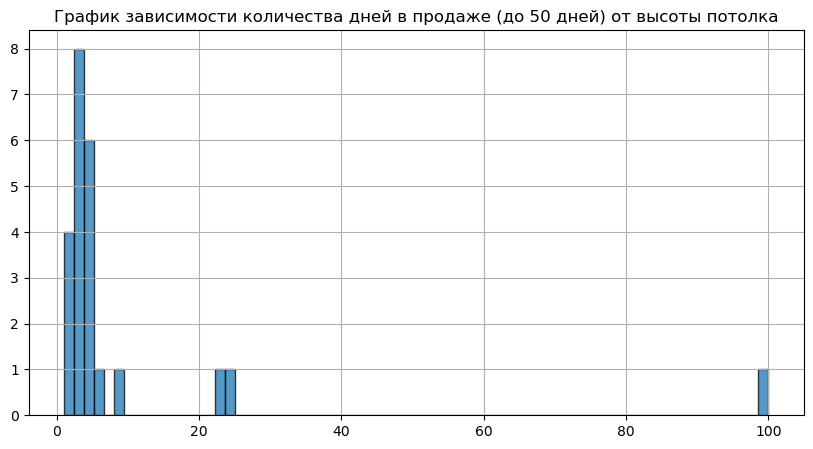

In [105]:
data_ceiling_height_pivot.query('days_exposition < 50')['ceiling_height'].hist(
    bins = 70, figsize = (10,5), ec = 'black', grid = True, alpha = 0.75).set(
    title = 'График зависимости количества дней в продаже (до 50 дней) от высоты потолка');

Похоже, что высота потолка никак не влияет на скорость продажи.

**Этаж квартиры**

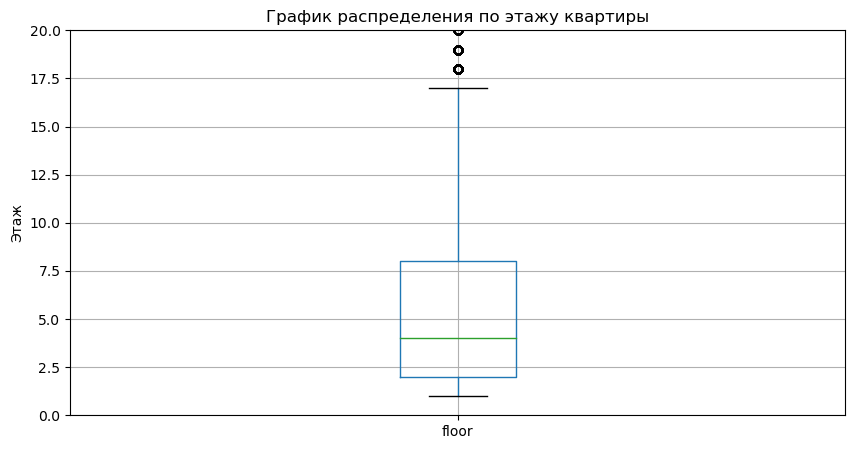

In [106]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5]
## Построим диаграмму размаха для столбца floor.
data.boxplot('floor')
plt.ylim(0,20)
plt.title('График распределения по этажу квартиры')
plt.ylabel('Этаж');

Диаграмма показывает, что в размах "усов" попадают квартиры с 1 по 14 этаж с межквартильным размахом примерно со 2 по 7 этаж, с медианой на 4 этаже, за пределами "усов" лежат значения выше 7 этажа.

In [107]:
# Сформируем сводную таблицу по стобцам floor и days_exposition, к которому применим метод median.
data_floor_pivot = data.pivot_table(
    index = ['floor'], values = 'days_exposition', aggfunc = 'median').reset_index().sort_values(
    by = 'days_exposition')
data_floor_pivot

,floor,days_exposition
30,33,7.00
27,28,11.00
29,32,53.00
17,18,70.00
22,23,74.00
15,16,80.50
13,14,81.00
12,13,82.50
10,11,84.00
11,12,84.00


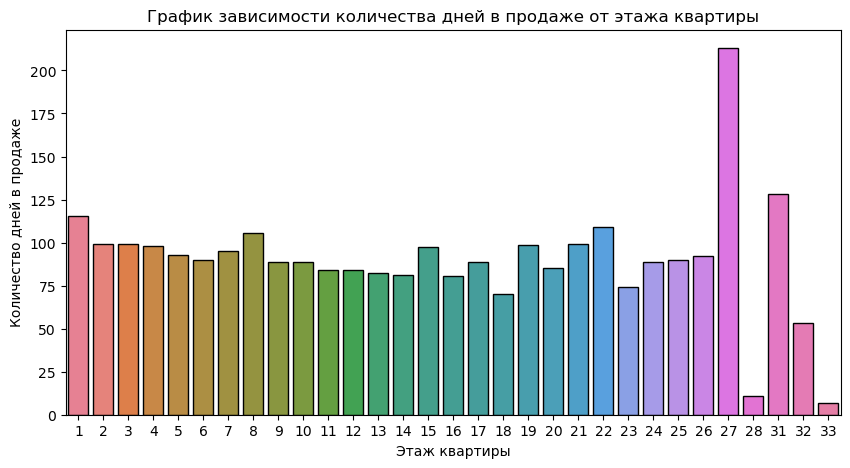

In [108]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим столбчатую диаграмму зависимости количества дней в продаже от высоты потолка.
sns.barplot(data = data_floor_pivot, x = 'floor', y = 'days_exposition', palette = 'husl', ec = 'black').set(
    title = 'График зависимости количества дней в продаже от этажа квартиры')
plt.ylabel('Количество дней в продаже')
plt.xlabel('Этаж квартиры');

Явной зависимости скорости продажи от этажа квартиры с учетом межквартильного размаха (2-7 этаж) - нет. После 20 этажа есть пики (21, 24,27), на которых квартиры продавались дольше. И 26 этаж - наоборот, быстрее. Сделаем срез по этажам после 20 и посмотрим.

In [109]:
data_floor_pivot_query = data_floor_pivot.sort_values(by='floor')[20:]

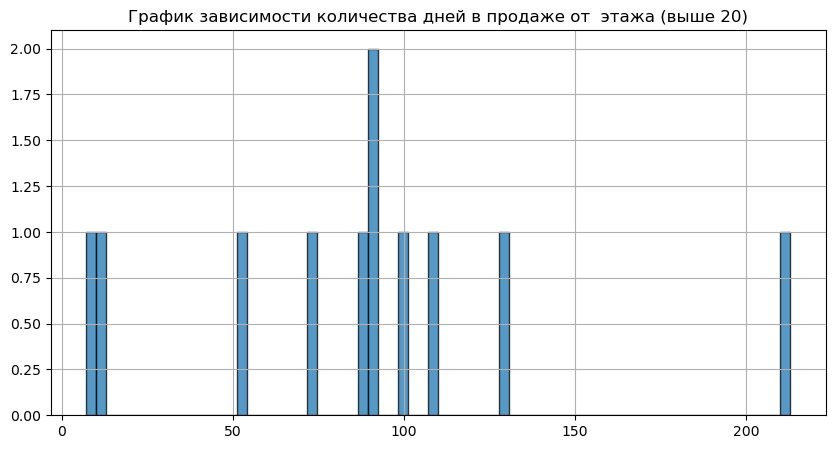

In [110]:
data_floor_pivot_query['days_exposition'].hist(
    bins = 70, figsize = (10,5), ec = 'black', grid = True, alpha = 0.75).set(
    title = 'График зависимости количества дней в продаже от  этажа (выше 20)');

На гистограмме видим один пик. В остальном график "ровный", скорее всего, такой зависимости нет, и этой пик на гистограмме возник не по причине этажа.

**Тип этажа квартиры («первый», «последний», «другой»)**

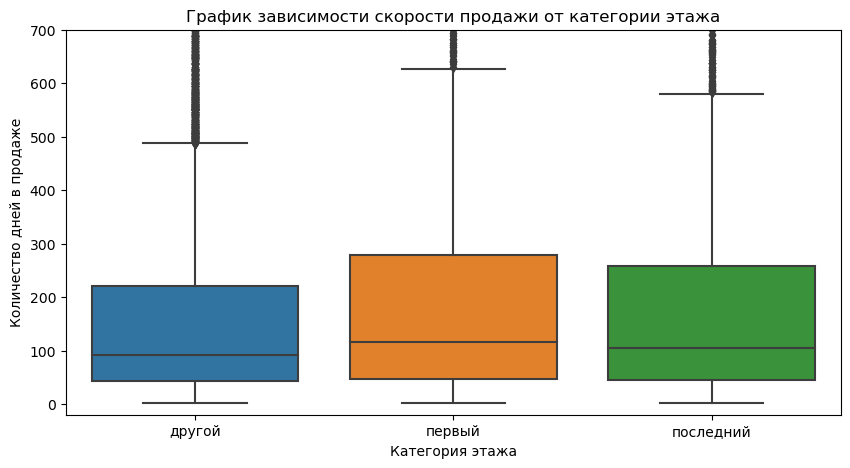

In [111]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму размаха для столбца which_floor по отношению к количеству дней продажи. 
sns.boxplot(x = 'which_floor', y = 'days_exposition', data = data)
plt.ylim(-20,700)
plt.title('График зависимости скорости продажи от категории этажа')
plt.xlabel('Категория этажа')
plt.ylabel('Количество дней в продаже');

С одной стороны диаграмма показывает, что квартиры не на первом и не на последнем этаже продавались  быстрее всего (размах "усов" от 50 до 200 дней, медиана - примерно 100 дней), квартиры на последнем этаже продавались быстрее квартир на первом этаже (размах "усов" от 70 до 220 дней, медиана - примерно 100 дней), квартиры на первом этаже продавались за 80-250 дней (медиана - 100 дней). Однако, мы видим, что медианное значение во всех трех категориях одинаковое, значит прямой  зависимости скорости продажи квартиры от категории этажа, скорее всего, нет. Но проверим среднее арифметическое значение.

In [112]:
# Сформируем сводную таблицу по стобцам which_floor и days_exposition, к которому применим метод mean.
data_which_floor_pivot = data.pivot_table(
    index = ['which_floor'], values = 'days_exposition', aggfunc = 'mean').reset_index().sort_values(
    by = 'days_exposition')
data_which_floor_pivot

,which_floor,days_exposition
0,другой,175.69
2,последний,193.51
1,первый,202.44


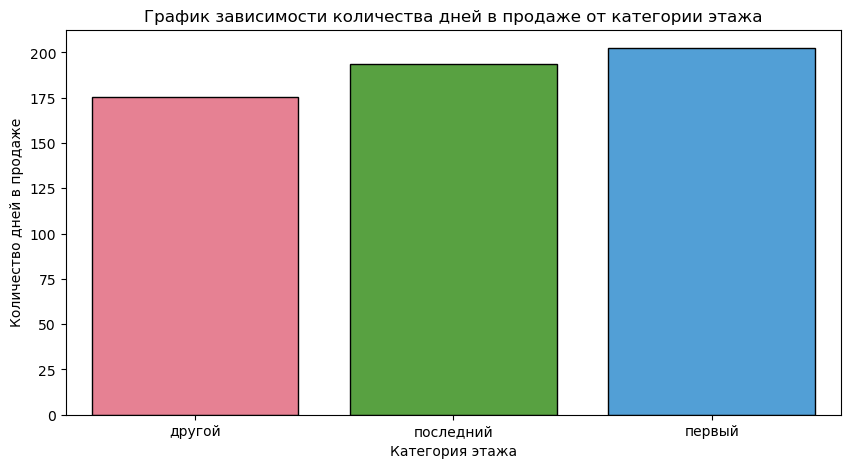

In [113]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим столбчатую диаграмму зависимости количества дней в продаже от категориий этажа(первый, последний, другой).
sns.barplot(data = data_which_floor_pivot, x = 'which_floor', y = 'days_exposition', palette = 'husl', 
            ec = 'black').set(
    title = 'График зависимости количества дней в продаже от категории этажа')
plt.ylabel('Количество дней в продаже')
plt.xlabel('Категория этажа');

А вот тут уже видна зависимость. Первый этаж продается дольше всего, за ним - последний, и быстрее всего продаются объекты на этажах между ними.

**Общее количество этажей в доме**

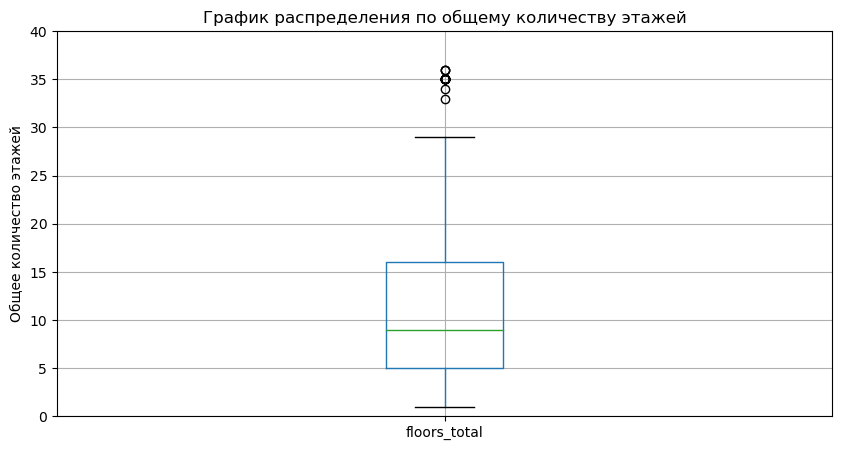

In [114]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму размаха для столбца floors_total.
data.boxplot('floors_total')
plt.ylim(0,40)
plt.title('График распределения по общему количеству этажей')
plt.ylabel('Общее количество этажей');

Диаграмма показывает, что в размах "усов" попадают квартиры c 1го по 27 этаж, с межквартильным размахом с 5 по 14 этаж, с медианой на 9 этаже, за пределами "усов" лежат значения выше 27 этажа.

In [115]:
# Сформируем сводную таблицу по стобцам floors_total и days_exposition, к которому применим метод median.
data_floors_total_pivot = data.pivot_table(
    index = ['floors_total'], values = 'days_exposition', aggfunc = 'median').reset_index().sort_values(
    by = 'days_exposition')
data_floors_total_pivot

,floors_total,days_exposition
32,36.00,24.50
28,29.00,45.00
29,33.00,53.00
18,19.00,68.00
13,14.00,75.00
14,15.00,79.50
11,12.00,80.00
24,25.00,83.00
17,18.00,84.00
23,24.00,85.00


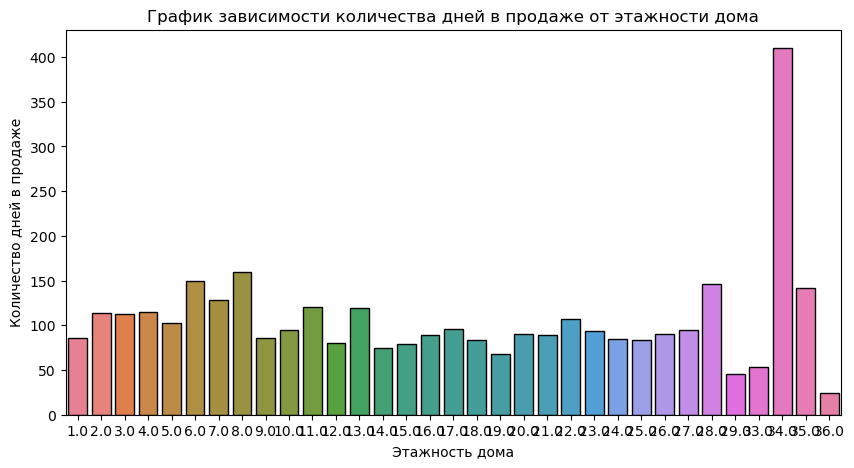

In [116]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим столбчатую диаграмму зависимости количества дней в продаже от этажности дома.
sns.barplot(data = data_floors_total_pivot, x = 'floors_total', y = 'days_exposition', 
            palette = 'husl', ec = 'black').set(
    title = 'График зависимости количества дней в продаже от этажности дома')
plt.ylabel('Количество дней в продаже')
plt.xlabel('Этажность дома');

Очевидной зависимости скорости продажи от этажности дома, учитывая межквартильный размах от 5 до 14 этажа, нет. Выбивается из общей картины 1 этаж, это традиционная история, он продается всегда хуже. И почему-то 8 этаж. Нет данных, чтобы понять, почему так. Так же как и 29, который продался быстрее всех. Дольше всего в продаже были 34-35 этажи, вероятно потому что они в своей доме последние, по аналогии с первым.

**Расстояние до центра города в метрах**

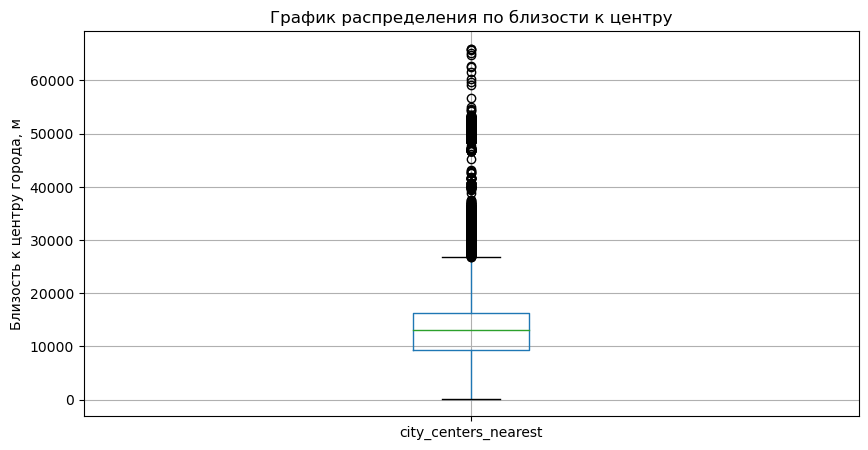

In [117]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5]
## Построим диаграмму размаха для столбца city_centers_nearest.
data.boxplot('city_centers_nearest')
plt.title('График распределения по близости к центру')
plt.ylabel('Близость к центру города, м');

Диаграмма показывает, что в размах "усов" попадают квартиры, находящиеся  в пределах 28 км от центра города, с межквартильным размахом от 9 км до 17 км, с медианой на 13 км, за пределами "усов" лежат значения выше 27 км по удаленности.

In [118]:
# Сформируем сводную таблицу по стобцам city_centers_nearest и days_exposition, к которому применим метод median.
data_city_centers_nearest_pivot = data.pivot_table(
    index = ['city_centers_nearest'], values = 'days_exposition', aggfunc = 'median').reset_index().sort_values(
    by = 'days_exposition')
data_city_centers_nearest_pivot

,city_centers_nearest,days_exposition
2959,11668.00,2.00
2118,9389.00,2.00
3736,13203.00,3.00
2742,11165.00,3.00
612,3773.00,3.00
...,...,...
6210,28226.00,1375.00
611,3771.00,1395.00
354,2780.00,1430.00
161,1724.00,1477.00


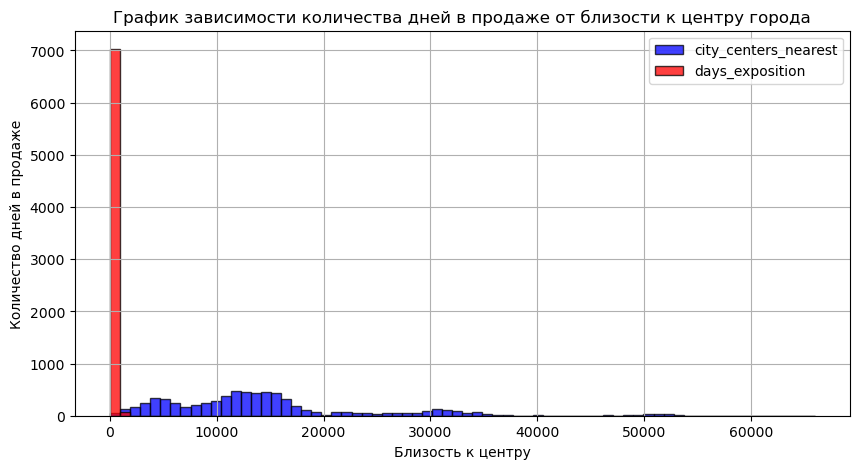

In [119]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим гистограмму зависимости количества дней в продаже от близости у центру города.
data_city_centers_nearest_pivot.plot(
    kind = 'hist', bins = 70, grid = True, alpha = 0.75,  ec = 'black', color = ['blue', 'red']).set(
    title = 'График зависимости количества дней в продаже от близости к центру города')
plt.xlabel('Близость к центру')
plt.ylabel('Количество дней в продаже');


Судя по гистограмме прослеживается следующая зависимость: чем ближе к центру, тем дольше продавалсь недвижимость. Возможно это связано с ценой, могу предположить, что недвижимость ближе к центру должна быть дороже. Выше мы уже выявили зависимость, по которой продавалось быстрее то, что стоило дешевле, так что тут все логично. Сделаем срез на первые 100 дней продажи.

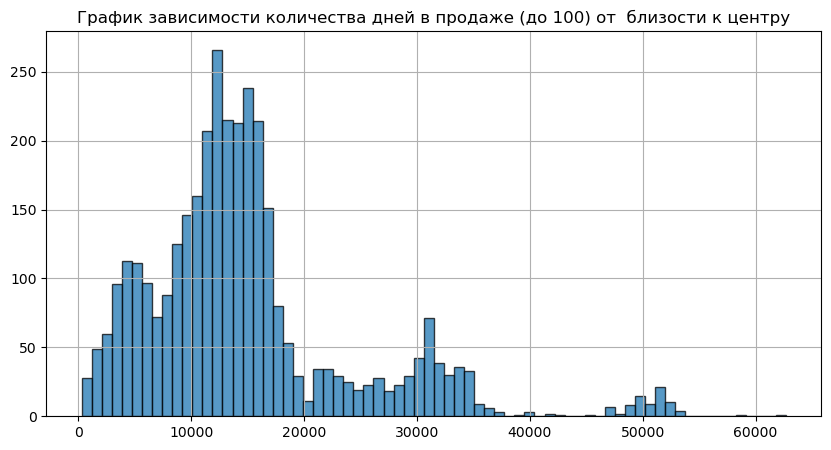

In [120]:
data_city_centers_nearest_pivot.query('days_exposition < 100')['city_centers_nearest'].hist(
    bins = 70, figsize = (10,5), ec = 'black', grid = True, alpha = 0.75).set(
    title = 'График зависимости количества дней в продаже (до 100) от  близости к центру');

Этот срез, в принципе, подтверждает предыдущий вывод. Но есть нюанс: недвижимость совсем близко к центру продавалась хоть и дольше, чем на окраине, но быстрее, чем в среднем по данным. Это может говорить о том, что близко к центру находится какая-нибудь элитная недвижимость, на которую всегда найдется покупатель.

**Расстояние до ближайшего аэропорта**

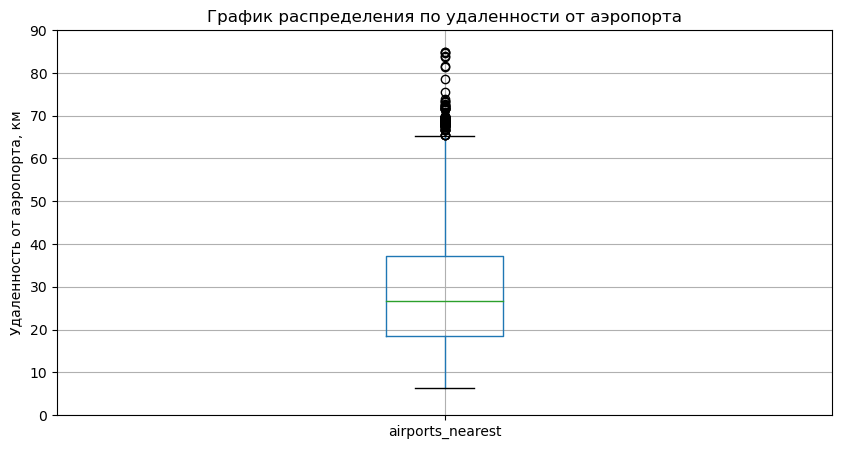

In [121]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму размаха для столбца airports_nearest.
data.boxplot('airports_nearest')
plt.ylim(0,90)
plt.title('График распределения по удаленности от аэропорта')
plt.ylabel('Удаленность от аэропорта, км');

Диаграмма показывает, что в размах "усов" попадают квартиры, находящиеся в пределах 8-63 км от аэропорта, с межквартильным размахом от 19-38 км, с медианой на 27 км, за пределами "усов" лежат значения выше 63 км.

In [122]:
# Сформируем сводную таблицу по стобцам airports_nearest и days_exposition, к которому применим метод median.
data_airports_nearest_pivot = data.pivot_table(
    index = ['airports_nearest'], values = 'days_exposition', aggfunc = 'median').reset_index().sort_values(
    by = 'days_exposition')
data_airports_nearest_pivot

,airports_nearest,days_exposition
217,10.78,2.00
6150,40.86,2.00
3939,26.69,3.00
6083,40.23,3.00
782,13.43,3.00
...,...,...
3639,25.47,1375.00
7453,55.91,1375.00
3324,24.45,1430.00
2257,20.18,1477.00


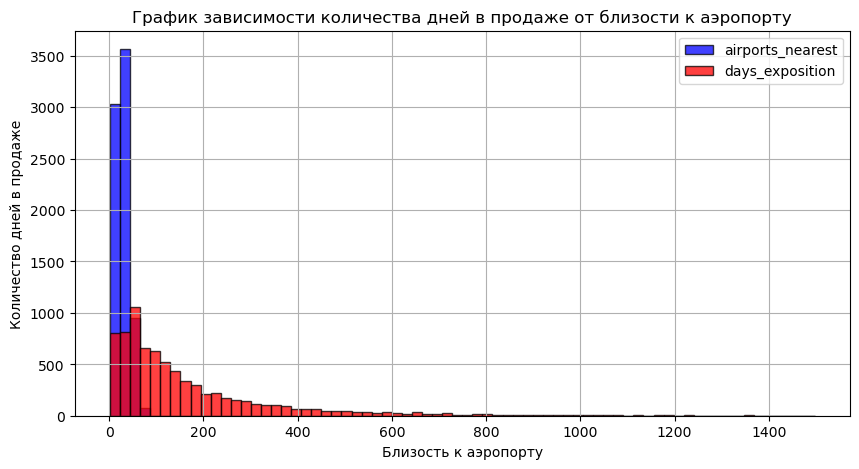

In [123]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим гистограмму зависимости количества дней в продаже от близости к аэропорту.
data_airports_nearest_pivot.plot(
    kind = 'hist', bins = 70, grid = True, alpha = 0.75,  ec = 'black', color = ['blue', 'red']).set(
    title = 'График зависимости количества дней в продаже от близости к аэропорту')
plt.xlabel('Близость к аэропорту')
plt.ylabel('Количество дней в продаже');


Судя по гистограмме прослеживается следующая зависимость:  дольше продавалась недвижимость ближе к аэропорту. Близость аэропорта хороша тогда, когда едешь в отпуск.:) А жить рядом с  постоянно с летающими над головой самолетами не все хотят. На всякий случай сделаем срез на 100 дней.

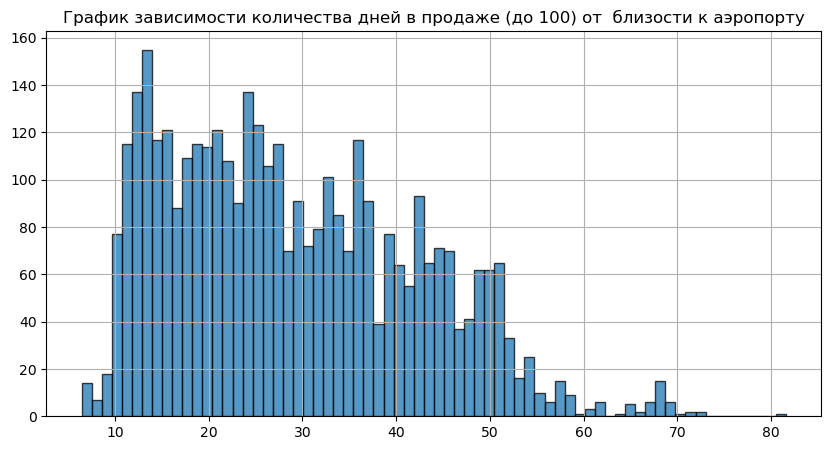

In [124]:
data_airports_nearest_pivot.query('days_exposition < 100')['airports_nearest'].hist(
    bins = 70, figsize = (10,5), ec = 'black', grid = True, alpha = 0.75).set(
    title = 'График зависимости количества дней в продаже (до 100) от  близости к аэропорту');

Думаю, вывод выше подтверждается. Чем ближе к аэропорту, тем дольше объект в продаже.

**Расстояние до ближайшего парка**

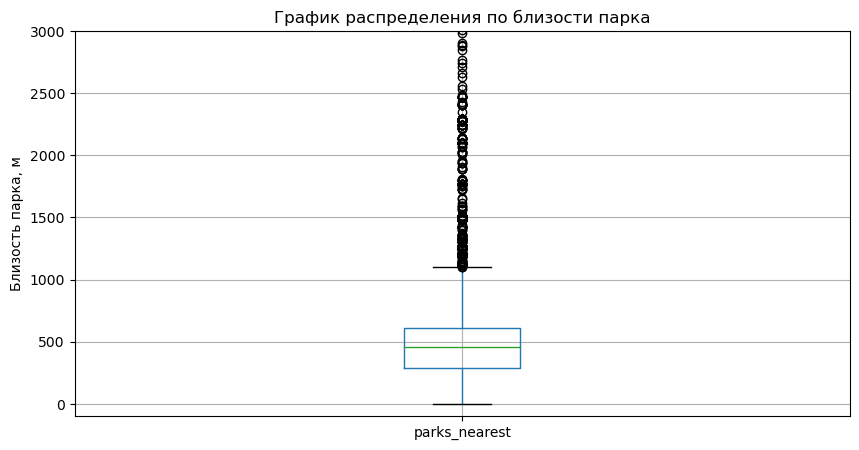

In [125]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму размаха для столбца parks_nearest.
data.boxplot('parks_nearest')
plt.ylim(-100,3000)
plt.title('График распределения по близости парка')
plt.ylabel('Близость парка, м');

Диаграмма показывает, что в размах "усов" попадают квартиры в 1100 м от парка,  с межквартильным размахом от 300 до 700 м, с медианой на 450 м, за пределами "усов" лежат значения выше 1100 м по удаленности.

In [126]:
# Сформируем сводную таблицу по стобцам parks_nearest и days_exposition, к которому применим метод median.
data_parks_nearest_pivot = data.pivot_table(
    index = ['parks_nearest'], values = 'days_exposition', aggfunc = 'median').reset_index().sort_values(
    by = 'days_exposition')
data_parks_nearest_pivot

,parks_nearest,days_exposition
834,937.00,3.00
900,1262.00,3.00
687,707.00,4.00
855,985.00,4.00
970,3064.00,4.00
...,...,...
731,757.00,726.00
909,1342.00,733.00
44,55.00,754.00
836,941.00,886.00


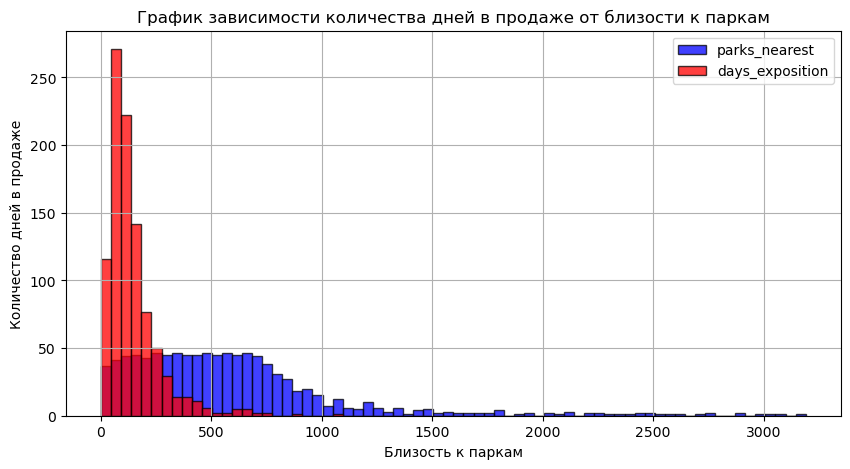

In [127]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим гистограмму зависимости количества дней в продаже от близости к паркам.
data_parks_nearest_pivot.plot(
    kind = 'hist', bins = 70, grid = True, alpha = 0.75, ec = 'black', color = ['blue', 'red']).set(
    title = 'График зависимости количества дней в продаже от близости к паркам')
plt.xlabel('Близость к паркам')
plt.ylabel('Количество дней в продаже');


На гистограмме видна явная зависимость скорости продажи объекта от близости к парку. Чем парк ближе, тем продавался объект дольше. Сделаем срез на 100 дней и посмотрим "поближе".

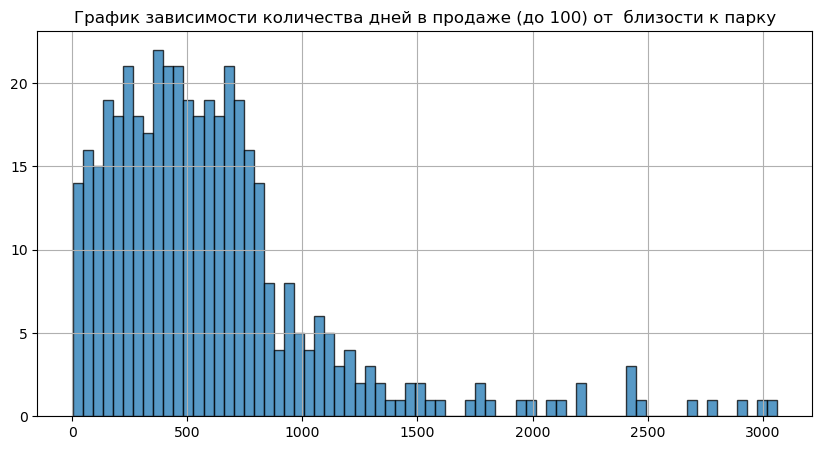

In [128]:
data_parks_nearest_pivot.query('days_exposition < 100')['parks_nearest'].hist(
    bins = 70, figsize = (10,5), ec = 'black', grid = True, alpha = 0.75).set(
    title = 'График зависимости количества дней в продаже (до 100) от  близости к парку');

Так и есть, близость парка удлиняла сроки продажи. Могу предположить, что этот факт опять же связан с ценой на недвижимость. Особенно, если парки находятся где-то в центре города или в туристических зонах.

**День и месяц публикации объявления**

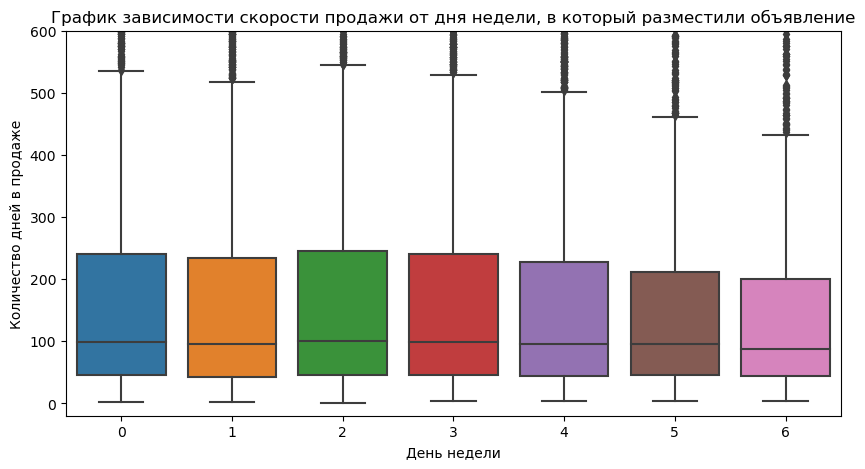

In [129]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму размаха для столбца weekday_exposition по отношению к количеству дней продажи. 
sns.boxplot(x = 'weekday_exposition', y = 'days_exposition', data = data)
plt.ylim(-20,600)
plt.title('График зависимости скорости продажи от дня недели, в который разместили объявление')
plt.xlabel('День недели')
plt.ylabel('Количество дней в продаже');

Гистограмма похожа на гистограмму стобца по категорийности этажей. Межквартильный размах у всех подстолбцов  отличается, но медиана во всех днях недели одинаковая. Попробуем посмотреть по среднему арифметическому значению.

In [130]:
# Сформируем сводную таблицу по стобцам weekday_exposition и days_exposition, к которому применим метод mean.
data_weekday_exposition_pivot = data.pivot_table(
    index = ['weekday_exposition'], values = 'days_exposition', aggfunc = 'mean').reset_index().sort_values(
    by = 'days_exposition')
data_weekday_exposition_pivot

,weekday_exposition,days_exposition
6,6,168.25
5,5,169.64
4,4,172.89
1,1,184.17
0,0,184.49
3,3,187.38
2,2,189.23


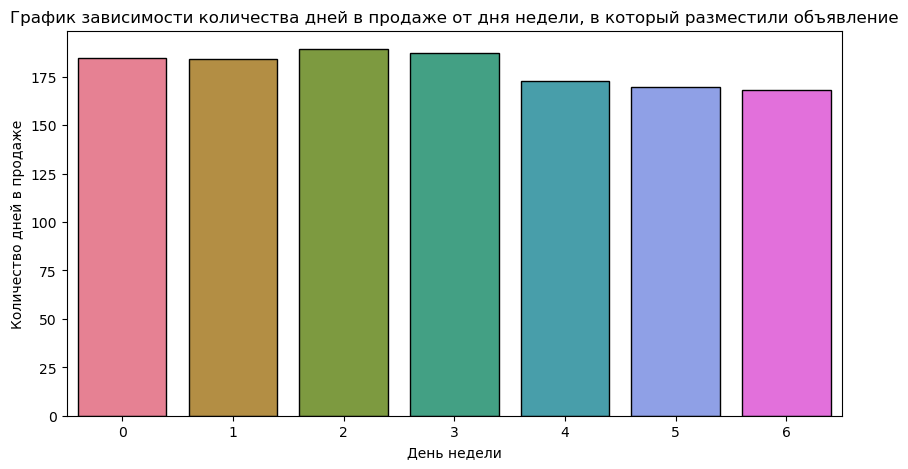

In [131]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим столбчатую диаграмму зависимости количества дней в продаже от дня недели, в который разместили объявление.
sns.barplot(
    data = data_weekday_exposition_pivot, x = 'weekday_exposition', y = 'days_exposition', palette = 'husl', 
    ec = 'black').set(
    title = 'График зависимости количества дней в продаже от дня недели, в который разместили объявление')
plt.ylabel('Количество дней в продаже')
plt.xlabel('День недели');

Я не вижу прямой зависимости скорости продажи от дня недели, в который было размещено объявление. Немного быстрее продаются объекты, объявления по которым были размещены в выходные дни. Немного дольше - среди недели. Возможно, это связано с рабочей загрузкой покупателей и возможностью уделить время на просмотр объявлений в будни, а в выходные могло быть больше просмотров объвлений, показов квартир и сделок (хотя бы предварительных).

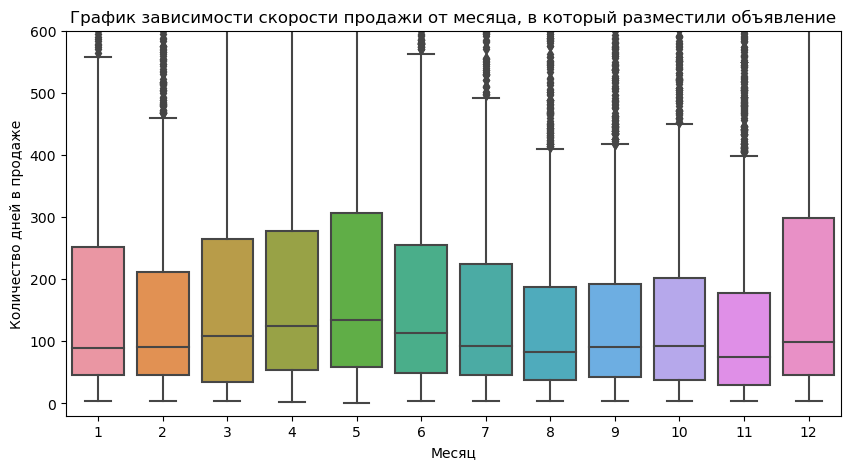

In [132]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим диаграмму размаха для столбца month по отношению к количеству дней продажи. 
sns.boxplot(x = 'month_exposition', y = 'days_exposition', data = data)
plt.ylim(-20,600)
plt.title('График зависимости скорости продажи от месяца, в который разместили объявление')
plt.xlabel('Месяц')
plt.ylabel('Количество дней в продаже');

На гистограмме видим, что дольше всего продавались объекты, объявление по которым были размещены в мае-июне. Повторюсь, учитывая специфику погодных условий в России и празничного календаря, этот период - начало дачного сезона и посадочных работ, у многих покупателей нет времени на просмотр объявлений. Посмотрим, на всякий случай среднее арифметическое по столбцу.

In [133]:
# Сформируем сводную таблицу по стобцам month_exposition и days_exposition, к которому применим метод mean.
data_month_exposition_pivot = data.pivot_table(
    index = ['month_exposition'], values = 'days_exposition', aggfunc = 'mean').reset_index().sort_values(
    by = 'days_exposition')
data_month_exposition_pivot

,month_exposition,days_exposition
10,11,153.15
7,8,154.47
9,10,160.94
8,9,165.87
1,2,170.69
6,7,176.05
0,1,186.77
5,6,195.28
3,4,200.42
2,3,202.92


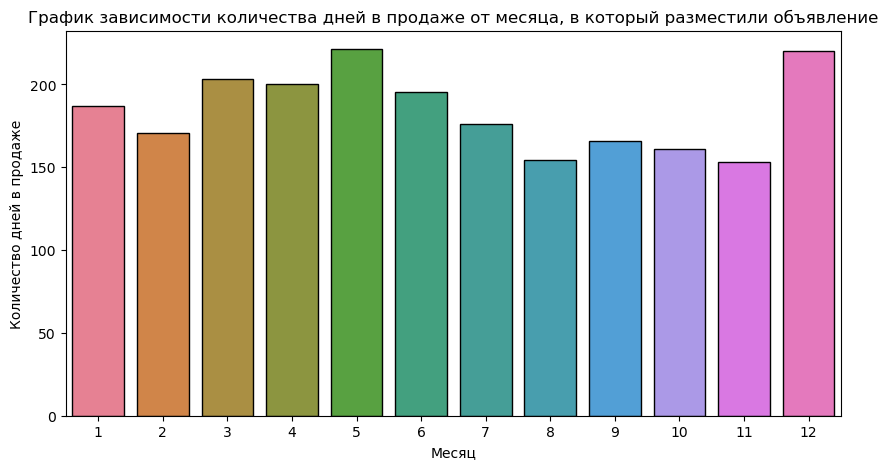

In [134]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим столбчатую диаграмму зависимости количества дней в продаже от месяца, в который разместили объявление.
sns.barplot(
    data = data_month_exposition_pivot, x = 'month_exposition', y = 'days_exposition', 
    palette = 'husl', ec = 'black').set(
    title = 'График зависимости количества дней в продаже от месяца, в который разместили объявление')
plt.ylabel('Количество дней в продаже')
plt.xlabel('Месяц');

Что собственно и требовалось доказать. Дольше всех - май и июнь, а также добавился декабрь. Еще одна  русская особенность - Новый год, к которому надо начинать готовиться примерно во ноябре, не до покупки квартир тут.:)

**Вывод:**
Проанализировав зависимость скорости продажи объекта от его характеристик можно сделать выводы, что на нее влияют следующие факторы:
1. Чем больше общая, жилая площадь и площадь кухни, тем короче сроки продажи;
2. Чем ниже цена, тем короче сроки продажи;
3. От количества комнат сроки продажи не зависят;
4. Тип этажа (первый, последний, другой) влияет на сроки продажи: первый и последний этажи продаются дольше;
5. Зависимости сроков продажи от этажности дома не выявлено;
6. Чем ближе к центру, тем в целом дольше продается недвижимость, за исключением той, что совсем в центре (элитной);
7. Чем ближе к аэропорту, тем дольше продавались объекты недвижимости;
8. Близость парка удлиняла сроки продажи недвижимости;
9. Существует небольшая зависимость скорости продажи от дней недели (в выходные объекты продавались быстрее); 
10. Существует зависимость скорости продажи от месяца. В мае-июне и декабре продажи шли хуже.

**Изучим от каких характеристик объекта зависит его цена**

**Общая площадь**

In [135]:
# Сформируем сводную таблицу по стобцам total_area и last_price, к которому применим метод median.
data_total_area_price_pivot = data.pivot_table(
    index = ['total_area'], values = 'last_price', aggfunc = 'median').reset_index().sort_values(
    by = 'last_price')
data_total_area_price_pivot

,total_area,last_price
105,28.66,690000.00
103,28.60,1060000.00
3,14.00,1190000.00
71,25.90,1200000.00
764,54.33,1300000.00
...,...,...
2110,410.00,240000000.00
2067,285.70,245000000.00
2126,618.00,300000000.00
2108,401.00,401300000.00


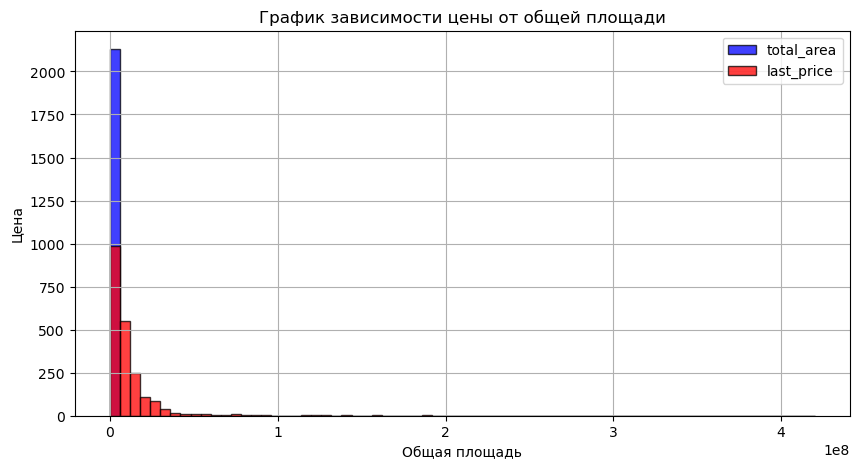

In [136]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим гистограмму зависимости цены от общей площади.
data_total_area_price_pivot.plot(
    kind = 'hist', bins = 70, grid = True, alpha = 0.75, ec = 'black', color = ['blue', 'red']).set(
    title = 'График зависимости цены от общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Цена');


Очевидно, что зависимость прямая: чем больше общая площадь, тем выше цена.

In [137]:
# Рассчитаем корреляцию между данными total_area и last_price.
data_total_area_price_pivot.corr()

,total_area,last_price
total_area,1.00,0.72
last_price,0.72,1.00


Предыдущий вывод  о прямой зависимости между этими данными подтверждается. Чем выше площадь, тем выше цена. 

**Жилая площадь**

In [138]:
# Сформируем сводную таблицу по стобцам living_area и last_price, к которому применим метод median.
data_living_area_price_pivot = data.pivot_table(
    index = ['living_area'], values = 'last_price', aggfunc = 'median').reset_index().sort_values(
    by = 'last_price')
data_living_area_price_pivot

,living_area,last_price
522,22.21,450000.00
649,26.08,950000.00
67,12.98,965780.00
473,20.97,990000.00
621,25.33,1100000.00
...,...,...
2358,218.00,240000000.00
2335,182.80,245000000.00
2372,258.00,300000000.00
2352,204.00,401300000.00


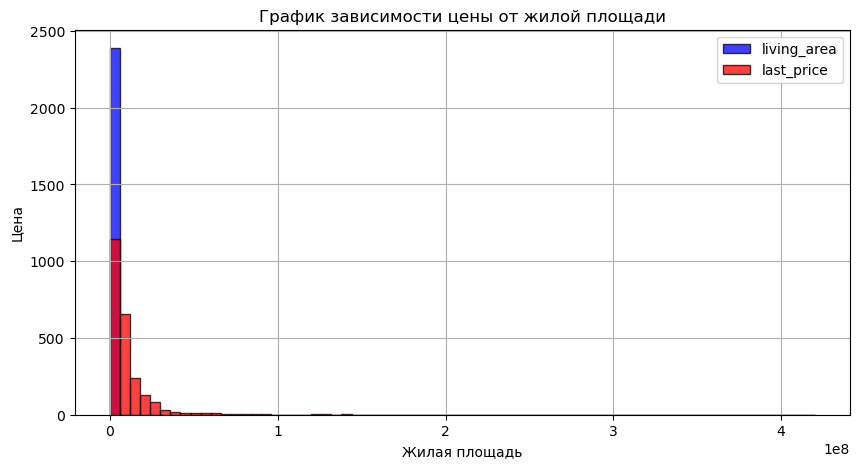

In [139]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим гистограмму зависимости цены от жилой площади.
data_living_area_price_pivot.plot(
    kind = 'hist', bins = 70, grid = True, alpha = 0.75, ec = 'black', color = ['blue', 'red']).set(
    title = 'График зависимости цены от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Цена');

Та же история, что и с общей площадью. Чем больше жилая площадь, тем выше цена. Рассчитаем корреляцию между этими данными для подтверждения гипотезы.

In [140]:
# Рассчитаем корреляцию между данными living_area и last_price.
data_living_area_price_pivot.corr()

,living_area,last_price
living_area,1.00,0.67
last_price,0.67,1.00


Что и требовалось доказать.

**Площадь кухни**

In [141]:
# Сформируем сводную таблицу по стобцам kitchen_area и last_price, к которому применим метод median.
data_kitchen_area_price_pivot = data.pivot_table(
    index = ['kitchen_area'], values = 'last_price', aggfunc = 'median').reset_index().sort_values(
    by = 'last_price')
data_kitchen_area_price_pivot

,kitchen_area,last_price
339,7.68,1100000.00
73,4.53,1200000.00
180,5.91,1300000.00
241,6.53,1300000.00
496,9.22,1500000.00
...,...,...
1549,66.50,131000000.00
1493,42.17,140000000.00
1558,87.50,150000000.00
1551,70.00,169000000.00


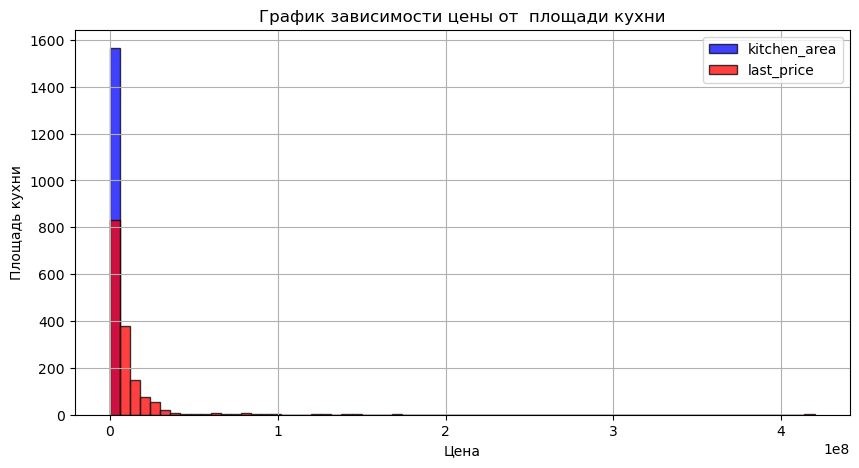

In [142]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим гистограмму зависимости цены от площади кухни.
data_kitchen_area_price_pivot.plot(
    kind = 'hist', bins = 70, grid = True, alpha = 0.75, ec = 'black', color = ['blue', 'red']).set(
    title = 'График зависимости цены от  площади кухни')
plt.xlabel('Цена')
plt.ylabel('Площадь кухни');


И тут без сюрпризов. Выше площадь кухни - выше цена. Рассчет корреляции ниже - тому подтверждение.

In [143]:
# Рассчитаем корреляцию между данными kitchen_area и last_price.
data_kitchen_area_price_pivot.corr()

,kitchen_area,last_price
kitchen_area,1.00,0.67
last_price,0.67,1.00


**Количество комнат**

In [144]:
# Сформируем сводную таблицу по стобцам rooms и last_price, к которому применим метод median.
data_rooms_price_pivot = data.pivot_table(
    index = ['rooms'], values = 'last_price', aggfunc = 'median').reset_index().sort_values(
    by = 'last_price')
data_rooms_price_pivot

,rooms,last_price
0,1,3600000
1,2,4769000
2,3,6200000
3,4,9000000
4,5,14000000
5,6,19000000
9,10,23000000
7,8,23095000
8,9,23750000
6,7,24900000


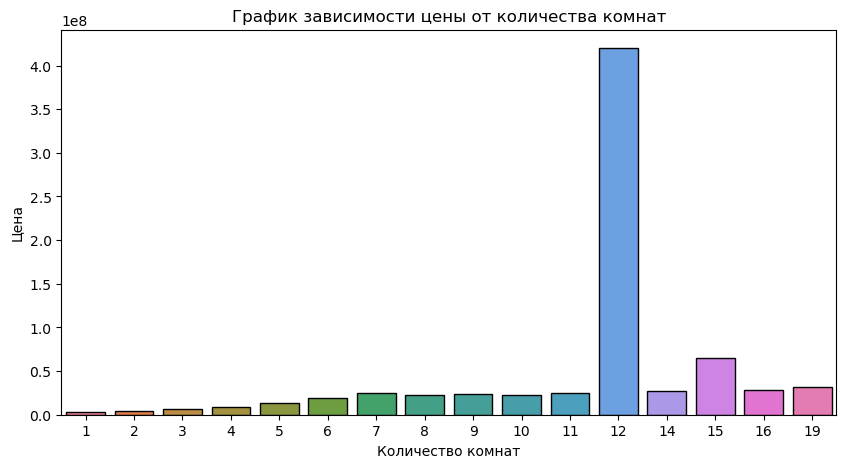

In [145]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим столбчатую диаграмму зависимости цены от количества комнат.
sns.barplot(
    data = data_rooms_price_pivot, x = 'rooms', y = 'last_price', palette = 'husl', ec = 'black').set(
    title = 'График зависимости цены от количества комнат')
plt.ylabel('Цена')
plt.xlabel('Количество комнат');

На столбчатой диаграмме видим определенную зависимость цены от количества комнат. Чем комнат больше, тем выше цена. На диаграмме видим какой-то, вероятно, эксклюзивный объект, с 12ю комнатами и самой высокой ценой.

In [146]:
# Рассчитаем корреляцию между данными rooms и last_price.
data_rooms_price_pivot.corr()

,rooms,last_price
rooms,1.00,0.27
last_price,0.27,1.00


В данном случае уровень корреляции количества комнат и итоговой цены ниже, чем площади и цены, но он положительный и зависимость между этими данными действительно есть.

**Этаж (первый, последний, другой)**

In [147]:
# Сформируем сводную таблицу по стобцам which_floor и last_price, к которому применим метод mean.
data_which_floor_price_pivot = data.pivot_table(
    index = ['which_floor'], values = 'last_price', aggfunc = 'mean').reset_index().sort_values(
    by = 'last_price')
data_which_floor_price_pivot

,which_floor,last_price
1,первый,4816582.15
0,другой,6705929.34
2,последний,7375039.87


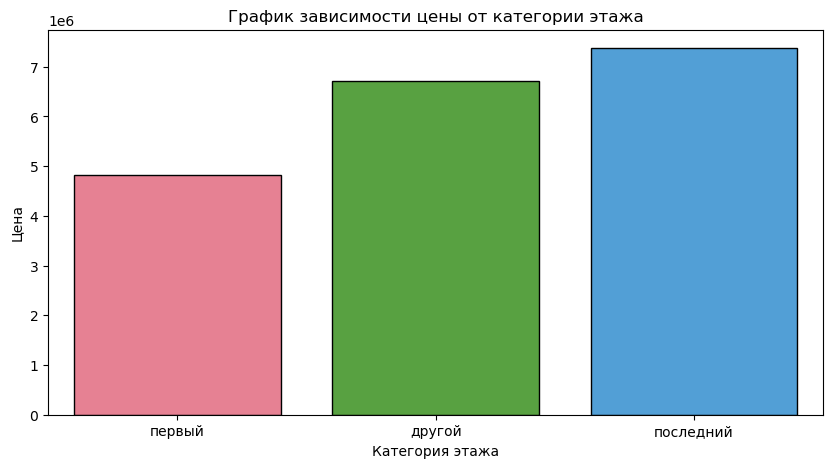

In [148]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим столбчатую диаграмму зависимости цены от категории этажа (первый, последний, другой).
sns.barplot(
    data = data_which_floor_price_pivot, x = 'which_floor', y = 'last_price', palette = 'husl', ec = 'black').set(
    title = 'График зависимости цены от категории этажа')
plt.ylabel('Цена')
plt.xlabel('Категория этажа');

Зависимость цены от категории этажа ясно видна. Первые этажы самые дешевые, это не удивляет. Последний, как ни странно, самый дорогой. Возможно, в Санкт-Петербурге и окрестностях очень красивые виды из окна? Или на верхних этажах и крышах есть какие-то терассы...

In [149]:
# Рассчитаем корреляцию между данными floors и last_price.
data_floor_price_pivot = data.pivot_table(
    index = ['floor'], values = 'last_price', aggfunc = 'mean').reset_index().sort_values(
    by = 'last_price')
data_floor_price_pivot.corr()

,floor,last_price
floor,1.00,0.30
last_price,0.30,1.00


Зависимость между номером этажа и итоговой ценой очевидна.

**Дата размещения (день, месяц, год)**

In [150]:
# Сформируем сводную таблицу по стобцам weekday_exposition и last_price, к которому применим метод median.
data_weekday_price_pivot = data.pivot_table(
    index = ['weekday_exposition'], values = 'last_price', aggfunc = 'median').reset_index().sort_values(
    by = 'last_price')
data_weekday_price_pivot

,weekday_exposition,last_price
6,6,4550000
4,4,4600000
5,5,4600000
0,0,4650000
3,3,4658000
2,2,4700000
1,1,4750000


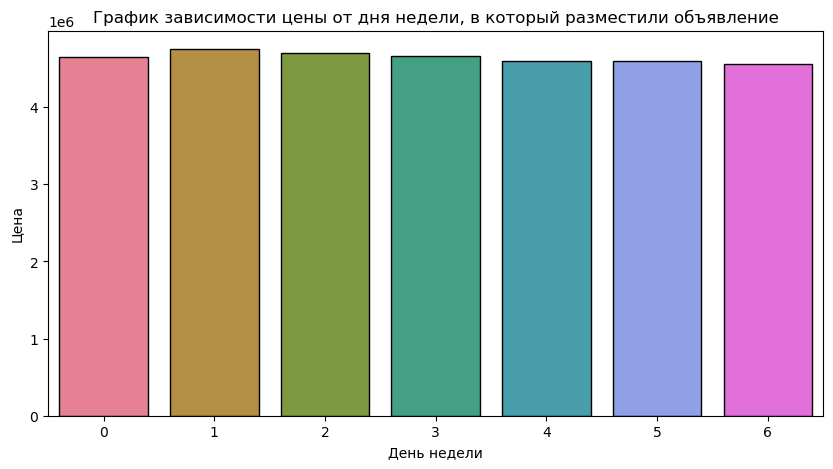

In [151]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим столбчатую диаграмму зависимости цены от дня недели, в который разместили объявление.
sns.barplot(
    data = data_weekday_price_pivot, x = 'weekday_exposition', y = 'last_price', palette = 'husl', ec = 'black').set(
    title = 'График зависимости цены от дня недели, в который разместили объявление')
plt.ylabel('Цена')
plt.xlabel('День недели');

Итоговая цена немного выше в начале недели и незначительно снижается к выходным. Рассчитаем корреляцию и посмотрим еще на линейную диаграмму.

In [152]:
# Рассчитаем корреляцию между данными weekday_exposition и last_price.
data_weekday_price_pivot.corr()

,weekday_exposition,last_price
weekday_exposition,1.00,-0.80
last_price,-0.80,1.00


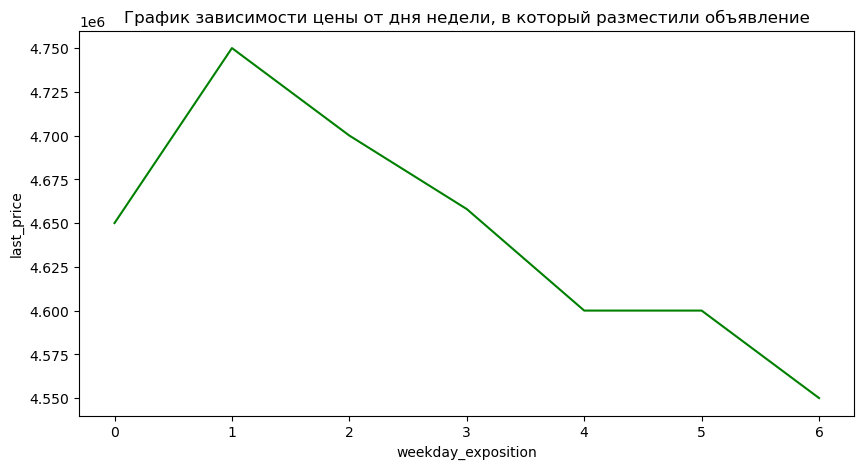

In [153]:
# Задаем размер графика
plt.rcParams['figure.figsize'] = [10,5] 
## Построим линейную диаграмму зависимости цены от дня недели, в который разместили объявление.
sns.lineplot(data = data_weekday_price_pivot, x = 'weekday_exposition', y = 'last_price', color = 'green').set(
title = 'График зависимости цены от дня недели, в который разместили объявление');

На линейной диаграмме более отчетливо видно, что цена растет ко вторнику примерно до 4.75 млн. руб., а снижается к воскресенью до 4.56 млн. руб. Изменения в цене очень незначительные и судя по корреляции зависимость отсутствует.

In [154]:
# Сформируем сводную таблицу по стобцам month_exposition и last_price, к которому применим метод median.
data_month_price_pivot = data.pivot_table(
    index = ['month_exposition'], values = 'last_price', aggfunc = 'median').reset_index().sort_values(
    by = 'last_price')
data_month_price_pivot

,month_exposition,last_price
5,6,4400000
4,5,4500000
0,1,4600000
7,8,4600000
9,10,4600000
1,2,4650000
6,7,4650000
2,3,4692000
10,11,4700000
11,12,4700000


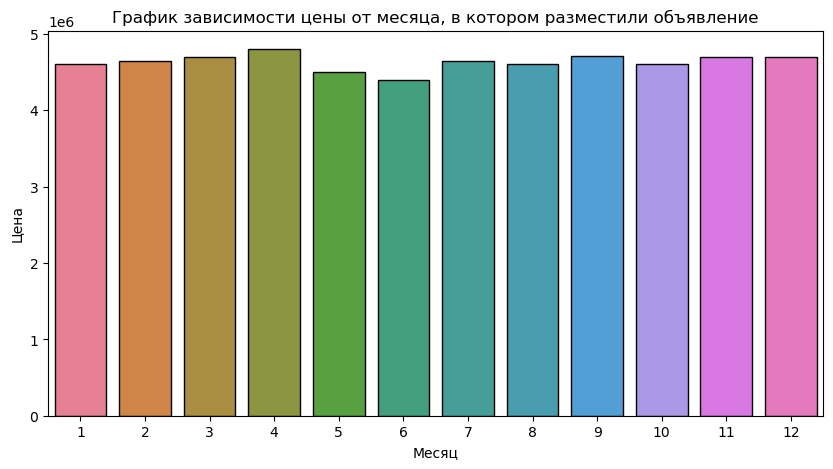

In [155]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим столбчатую диаграмму зависимости цены от месяца, в который разместили объявление.
sns.barplot(
    data = data_month_price_pivot, x = 'month_exposition', y = 'last_price', palette = 'husl', ec = 'black').set(
    title = 'График зависимости цены от месяца, в котором разместили объявление')
plt.ylabel('Цена')
plt.xlabel('Месяц');

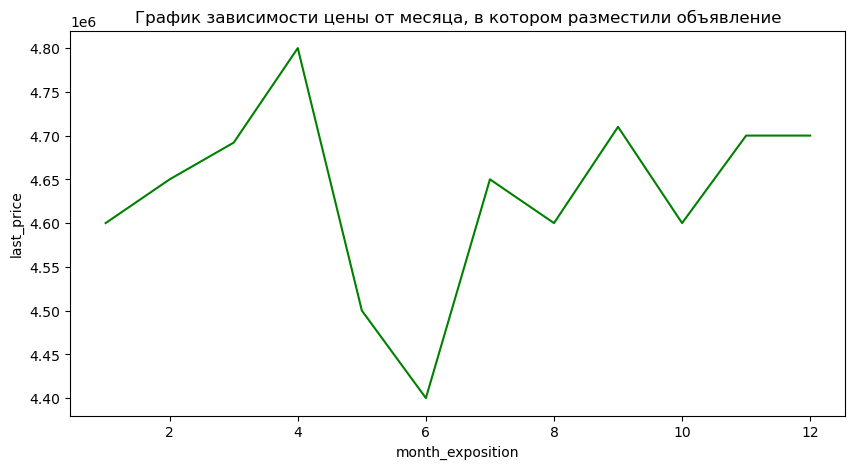

In [156]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим линейную диаграмму зависимости цены от месяца, в который разместили объявление.
sns.lineplot(data = data_month_price_pivot, x = 'month_exposition', y = 'last_price', color = 'green').set(
title = 'График зависимости цены от месяца, в котором разместили объявление');

In [157]:
# Рассчитаем корреляцию между данными month_exposition и last_price.
data_month_price_pivot.corr()

,month_exposition,last_price
month_exposition,1.00,0.12
last_price,0.12,1.00


На столбчатой диаграмме мы видим незначительные изменения цены от месяца к месяцу, по линейной диаграмме мы можем сказать, что цена падает  с 4.8 млн. руб. в апреле до примерно 4.4 млн. руб. в мае-июне, потом снова растет, и незначительно колеблется вниз в августе,октябре и марте. С учетом предыдущего исследования зависимости скорости продажи от месяца, когда было размещено объявление, можно однозначно сказать, что несильная зависимость есть в мае и июне, как по снижению цены, так и по увеличению сроков продажи, что доказывает положительный уровень корреляции.

In [158]:
# Сформируем сводную таблицу по стобцам year_exposition и last_price, к которому применим метод median.
data_year_price_pivot = data.pivot_table(
    index = ['year_exposition'], values = 'last_price', aggfunc = 'median').reset_index().sort_values(
    by = 'last_price')
data_year_price_pivot

,year_exposition,last_price
3,2017,4500000
2,2016,4550000
4,2018,4600000
5,2019,5100000
1,2015,5324000
0,2014,7640000


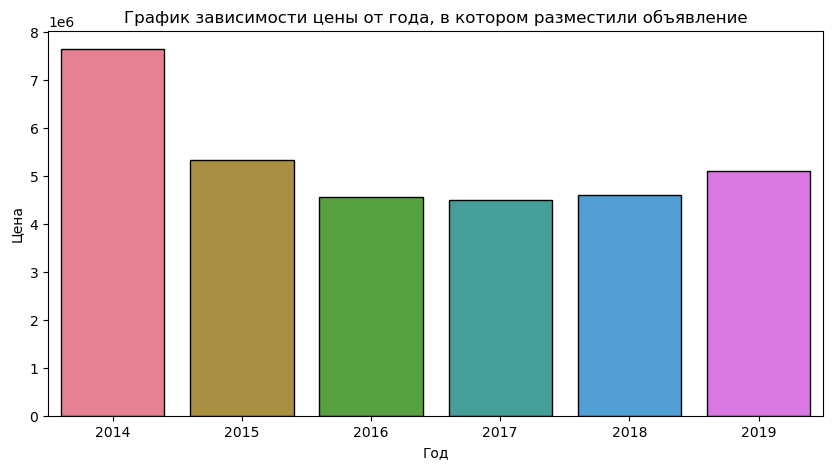

In [159]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим столбчатую диаграмму зависимости цены от года, в который разместили объявление.
sns.barplot(
    data = data_year_price_pivot, x = 'year_exposition', y = 'last_price', palette = 'husl', ec = 'black').set(
    title = 'График зависимости цены от года, в котором разместили объявление')
plt.ylabel('Цена')
plt.xlabel('Год');

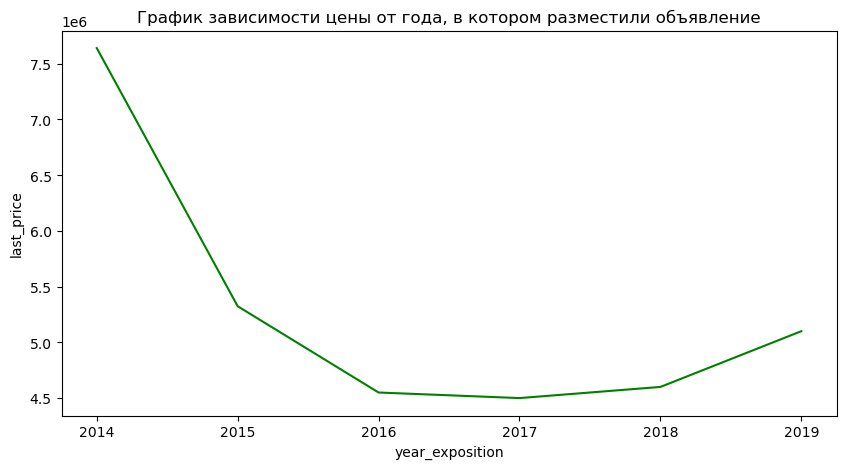

In [160]:
# Задаем размер графика.
plt.rcParams['figure.figsize'] = [10,5] 
## Построим линейную диаграмму зависимости цены от года, в который разместили объявление.
sns.lineplot(data = data_year_price_pivot,  x = 'year_exposition', y = 'last_price', color = 'green').set(
title = 'График зависимости цены от года, в котором разместили объявление');

In [161]:
# Рассчитаем корреляцию между данными year_exposition и last_price.
data_year_price_pivot.corr()

,year_exposition,last_price
year_exposition,1.00,-0.66
last_price,-0.66,1.00


Судя по диаграммам зависимость очевидна. Самые высокие цены на недвижимость были в 2014 году (выше 7.5 млн. руб.). Затем наступил резкий спад на рынке недвижимости (до 5.4 млн. руб. в 2015 году и  продолжился до 4.5 млн. руб. к 2017 году), который прекратился только в 2018 году, когда виден незначительный подъем и попытка рынка вернуться к ценам 2015 года в 2019 году. С учетом исследования выше думаю, что такое падение и рост связаны с перенасыщением рынка объявлениями о продаже. Спрос рождает предложение. С 2014го по 2018й годы  был существенный рост в количестве объявлений, в те же годы цена на рынке недвижимости падает. В 2019ом году количество объявлений резко упало, а цена начала расти. Но уровень корреляции отрицательный. Поэтому скорее тут можно говорить о том, что сама итоговая цена от года не зависит, но каждый год ситуация в экономике, на рынке недвижимости и в целом в мире меняется (например, пандемия ковид-19) и это влияет на скачки цен на недвижимость.

**Вывод:**
Проанализировав зависимость цены объекта от его характеристик можно сделать выводы, что на нее влияют следующие факторы:
1. Чем больше общая, жилая площадь и площадь кухни, тем выше цена;
2. Чем больше комнат, тем выше цена;
3. Тип этажа (первый, последний, другой) влияет на итоговую цену: первый стоит дешевле всего, последний дороже всего, выше я предположила, что это может быть связано с прекрасным видом из окна последнего этажа, но это неточно.:);
4. К выходным цена незначительно, но снижается;
5. В мае-июне и декабре цена также снижена, возможно из-за праздничных дней и дачного сезона;
6. С 2014 года по 2018 год наблюдался сильный спад цены, который остановился к 2019 году и начался ее плавный рост ( достигла уровня 2015 года).

**Зависимость стоимости квадратного метра от населенного пункта**

In [162]:
# Выведем 10 населенных пунктов с наибольшим числом объявлений и среднюю цену квадратного метра для каждого их этих населенных 
# пунктов.
data_name_count_pivot = data.pivot_table(index = 'locality_name', values = 'square_meter_price',  
                                       aggfunc = {'mean','count'}).reset_index().sort_values(
    by = 'count', ascending = False)
data_name_count_pivot.head(10)

,locality_name,count,mean
33,Санкт-Петербург,15538,114811.02
205,поселок Мурино,526,85029.06
301,посёлок Шушары,435,78277.47
3,Всеволожск,392,68617.55
32,Пушкин,369,103125.37
13,Колпино,338,75424.15
281,посёлок Парголово,323,90289.35
6,Гатчина,307,68745.69
92,деревня Кудрово,283,92296.75
4,Выборг,237,58141.49


In [163]:
# Сохраним эти данные в переменной data_first_10_names.
data_first_10_names = data_name_count_pivot.head(10)

In [164]:
# Отсортируем эти данные в порядке убывания по среднему арифметическому значению.
# Получим населенный пункт с минимальной стоимостью кв.м.
data_first_10_names.sort_values(by = 'mean', ascending = False).tail(1)

,locality_name,count,mean
4,Выборг,237,58141.49


In [165]:
# Получим населенный пункт с максимальной стоимостью кв.м.
data_first_10_names.sort_values(by = 'mean', ascending = False).head(1)

,locality_name,count,mean
33,Санкт-Петербург,15538,114811.02


Самая высокая средняя стоимость  кв.м недвижимости в Санкт-Петербурге  - 114811.02 руб. (он же лидирует по количеству объявлений - 15538). А самая низкая средняя стоимость кв. м в Выборге - 58141 руб. (это последний  населенный пункт в нашем топ-10 по количеству объявлений - 237). Прослеживается прямая зависимость стоимости кв.м от количества объявлений. Посмотрим общую статистику по стоимости кв. м без учета количества объявлений.

In [166]:
# Посмотрим, в каком населенном пункте максимальная стоимость кв.м без учета сортировки городов по количеству объявлений.
data_name_count_pivot.sort_values(by = 'mean', ascending = False).head(1)

,locality_name,count,mean
7,Зеленогорск,24,115122.50


А вот тут нас ждал сюрприз...Зеленогорск - маленький город на 15 тыс.чел в 50 км. от Санкт-Петербурга, а цена за кв. м недвижимости хоть и минимально (около 200 руб.), но выше. Количество объявлений до смешного мало, всего 24. Может дело в этом? Недвижимость настолько редко там продается, что по цене сравнялась с Санкт-Петербургом? Похоже, что это исключение из общего правила.

In [167]:
# Посмотрим, в каком населенном пункте минимальная стоимость кв.м без учета сортировки городов по количеству объявлений.
data_name_count_pivot.sort_values(by = 'mean', ascending = False).tail(1)

,locality_name,count,mean
139,деревня Старополье,3,11206.00


Деревня Ставрополье -  маленький населенный пункт с 823 чел. жителей по данным 2017 года. Эти данные подтверждают гипотезу, что чем населенный пункт меньше и  меньше объявлений (не считая Зеленогорска), тем цена за кв. м дешевле.

**Вывод:**
Второй по дороговизне кв. м недвижимости - Санкт-Петербург. Ожидалось, что он будет первым, но Зеленогорск удивил.:) В целом зависимость цены от населенного пункта очевидна.

**Зависимость стоимости объектов недвижимости от расстояния до центра Санкт-Петербурга**

In [168]:
# Выводим список объектов недвижимости в Санкт-Петербурге.
data[data['locality_name'] == 'Санкт-Петербург']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_meter_price,weekday_exposition,month_exposition,year_exposition,which_floor,city_centers_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,482.00,2,755.00,NaN,120370,3,3,2019,другой,16.03
2,10,5196000,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,90.00,2,574.00,558.00,92785,3,8,2015,другой,13.93
3,0,64900000,159.00,2015-07-24,3,2.65,14.00,91.73,9,False,...,84.00,3,234.00,424.00,408176,4,7,2015,другой,6.80
4,2,10000000,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,112.00,1,48.00,121.00,100000,1,6,2018,другой,8.10
7,5,7915000,71.60,2019-04-18,2,2.65,24.00,41.31,22,False,...,NaN,0,NaN,NaN,110544,3,4,2019,другой,11.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28,1,2.86,15.00,16.30,4,False,...,353.00,2,652.00,29.00,100566,2,2,2018,другой,16.08
23690,3,5500000,52.00,2018-07-19,2,2.65,5.00,31.00,2,False,...,300.00,0,NaN,15.00,105769,3,7,2018,другой,6.26
23691,11,9470000,72.90,2016-10-13,2,2.75,25.00,40.30,7,False,...,NaN,1,806.00,519.00,129903,3,10,2016,другой,4.49
23694,9,9700000,133.81,2017-03-21,3,3.70,5.00,73.30,3,False,...,796.00,3,381.00,NaN,72490,1,3,2017,другой,4.23


In [169]:
# Сформируем срез по стоимости кв. м и близости к центру в Санкт-Петербурге.
spb_data_center_sq_meter = data.query('locality_name == "Санкт-Петербург"').loc[:, [
    'city_centers_nearest_km','square_meter_price']].sort_values(by = 'city_centers_nearest_km')
spb_data_center_sq_meter

,city_centers_nearest_km,square_meter_price
13694,0.18,195591
1182,0.21,172619
8614,0.21,109900
1934,0.29,88796
20873,0.29,101321
...,...,...
21668,NaN,131195
21881,NaN,263313
21955,NaN,301624
22554,NaN,107898


In [170]:
# Удалим пропуски в столбце city_centers_nearest_km.
spb_data_center_sq_meter.dropna(subset = ['city_centers_nearest_km'], inplace = True)
spb_data_center_sq_meter

,city_centers_nearest_km,square_meter_price
13694,0.18,195591
1182,0.21,172619
8614,0.21,109900
1934,0.29,88796
20873,0.29,101321
...,...,...
10798,28.64,78225
19892,28.81,79890
16787,29.26,56526
13031,29.34,73943


Сделаем срез по близости к центру меньше 3 км и посмотрим, есть ли зависимость между этим параметром и ценой кв. м.

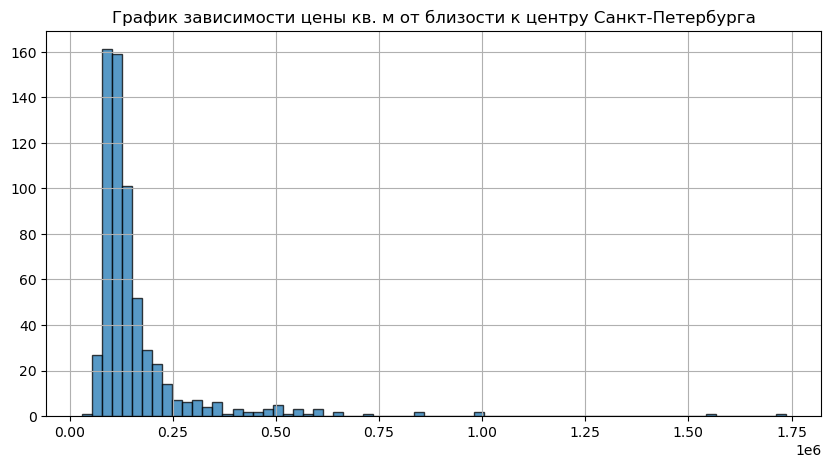

In [171]:
spb_data_center_sq_meter.query('city_centers_nearest_km < 3')['square_meter_price'].hist(
    bins = 70, figsize = (10,5), ec = 'black', grid = True, alpha = 0.75).set(
    title = 'График зависимости цены кв. м от близости к центру Санкт-Петербурга');

Определенно такая зависимость существует. Мои прошлые предположения оказались верны. Цены на недвижимость в центре города дороже, чем на окраине.

**Вывод:**
Цена за кв. м в центре Санкт-Петербурга значительно выше, чем на окраине.

### Общий вывод

В данной проектной работе нами были изучены и проанализированы данные сервиса Яндекс.Недвижимость - архив объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктов, размещенных за 2014-2019 годы.

В архиве представлена недвижимость разная по локации (населенный пункт), по стоимости, по площади, по количеству комнат, по высоте потолка, по наличию балкона, по типажу (студия, апартаменты, свободная планировка), по этажу (первый, последний, другой), по этажу дома, по удаленности от центра, аэропорта, парков и прудов.

Задача проектной работы состояла в том, чтобы выявить параметры, влияющие на рыночную стоимость объекта недвижимости.
Мы рассмотрели несколько срезов данных:
1. Зависимость сроков продажи объектов недвижимости от ее характеристик;
2. Зависимость итоговой цены объектов недвижимости от ее характеристик;
3. Зависимость цены кв. м от локации объекта недвижимости (населенного пункта);
4. Зависимость цены кв. м от близости к центру Санкт-Петербурга.

Итак, мы пришли к следующим выводам:
1. Параметры, влияющие на рыночную стоимость это, в первую очередь, площадь объекта (общая, жилая, кухня), этаж (первый, последний, другой), а также  его удаленность от центра города и парков. Чем выше площадь и дом ближе к центру города и парковым зонам, тем дороже будет стоить квартира. Квартиры на последних этажах стоят дороже, чем на этажах ниже и первом, по моему предположению, из-за открывающегося из окон верхних этажей вида.
2. Во вторую очередь можем отследить не столь явную зависимость, которая влияет на рыночную стоимость: количество комнат, а также дата размещения объявления. Чем больше комнат, тем квартира дороже.  В мае, июня и декабре наблюдался спад цены,  вероятно, из-за праздничных дней и дачного сезона. В 2014-2018 годы рынок недвижимости явно дешевел, в 2019 году начал расти.
3. Недвижимость в Санкт-Петербурге ожидаемо сильно дороже, чем в его окрестностях. Но в остальном все предыдущие выводы можно применить и к нему, как к отдельному населенному пункту.
Возможно, не совсем корректно использовать эти данные для анализа. Было бы правильнее выделить Санкт-Петербург в группу с другими большими городами, например, Москвой, и сравнивать их, а соседние с Санкт-Петербургом населенные пункты  - между собой. Это было бы более правильно с точки зрения уменьшения погрешностей в расчетах. Цены в Санкт-Петербурге и его окрестностях несопоставимы, разбросы очень большие.